<h1 align='center'>Pandas Essentials</h1>

# Table of contents

1.   <a href='#What-is-Pandas?'>What is Pandas?</a>
2.   <a href='#What-problem-does-pandas-solve?'>What problem does pandas solve?</a>
3.   <a href="#Series">Series</a>
4.   <a href="#DataFrame">DataFrame</a>
5.   <a href='#Indexing-and-Selecting-Data'>Indexing and Selecting Data</a>
5.   <a href="#I/O-Operations">I/O Operations</a>
6.   <a href="#Statistical-Analysis">Statistical Analysis</a>
7.   <a href='#Dealing-with-date-and-time'>Dealing with date and time</a>
10.  <a href="#Data-Manipulation">Data Manipulation</a>
    11.  <a href="#Data-Preparation">Data Preparation</a>
        12.  <a href="#Merging">Merging</a>
            13.  <a href="#Merging-on-Index">Merging on Index</a>
        15.  <a href="#Combining">Combining</a>
        16.  <a href="#Pivoting">Pivoting</a>
            17.  <a href="#Pivoting-with-Hierarchical-Indexing">Pivoting with Hierarchical Indexing</a>
            18.  <a href="#Pivoting-from-“Long”-to-“Wide”-Format">Pivoting from “Long” to “Wide” Format</a>
        19.  <a href="#Removing">Removing</a>
    20.  <a href="#Data-Transformation">Data Transformation</a>
        21.   <a href="#Removing-Duplicates">Removing Duplicates</a>
        22.   <a href="#Mapping">Mapping</a>
        23.   <a href="#Replacing-Values-via-Mapping">Replacing Values via Mapping</a>
        24.   <a href="#Adding-Values-via-Mapping">Adding Values via Mapping</a>
        25.   <a href="#Rename-the-Indexes-of-the-Axes">Rename the Indexes of the Axes</a>
        26.   <a href="#Discretization-and-Binning">Discretization and Binning</a>
        27.   <a href="#Detecting-and-Filtering-Outliers">Detecting and Filtering Outliers</a>
    28.   <a href="#Data-Aggregation">Data Aggregation</a>
        29.   <a href="#GroupBy">GroupBy</a>
        30.  <a href="#Hierarchical-Grouping">Hierarchical Grouping</a>
        31.  <a href="#Group-Iteration">Group Iteration</a>
        32.  <a href="#Functions-on-Groups">Functions on Groups</a>
33.  <a href="#Summarizing-Data">Summarizing Data</a>
34.  <a href='#Working-with-Sqlite-db-using-pandas'>Working with Sqlite db using pandas</a>
35.  <a href='#Time-series-Analysis'>Time series Analysis</a>
36.  <a href="#Reference">Reference</a>

# What is Pandas?

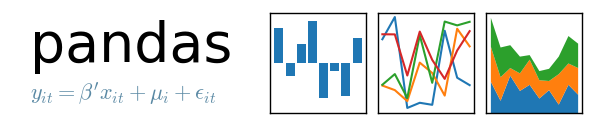

# Pandas is a library specialized for data analysis,it is mainly focused on calculation and data processing

* Pandas is an open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language

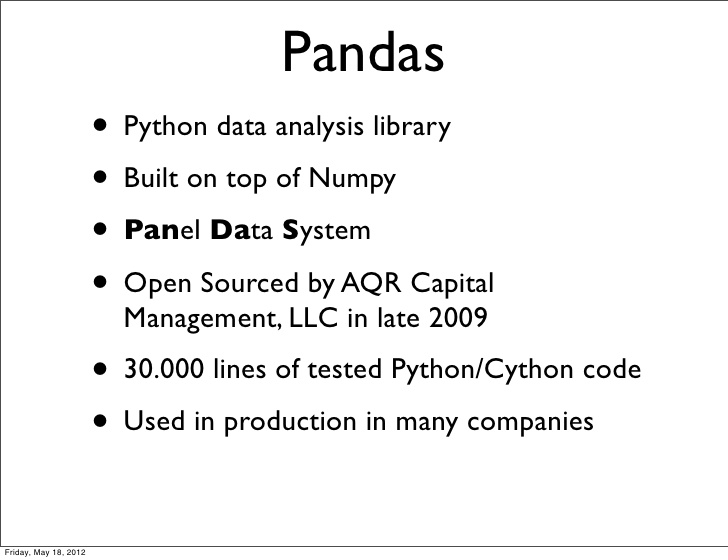

# What problem does pandas solve?

* Python has long been great for data munging and preparation, but less so for data analysis and modeling. pandas helps fill this gap, enabling you to carry out your entire data analysis workflow in Python without having to switch to a more domain specific language like R.

* Combined with the excellent IPython toolkit and other libraries, the environment for doing data analysis in Python excels in performance, productivity, and the ability to collaborate.

* pandas does not implement significant modeling functionality outside of linear and panel regression; for this, look to statsmodels and scikit-learn. More work is still needed to make Python a first class statistical modeling environment, but we are well on our way toward that goal.

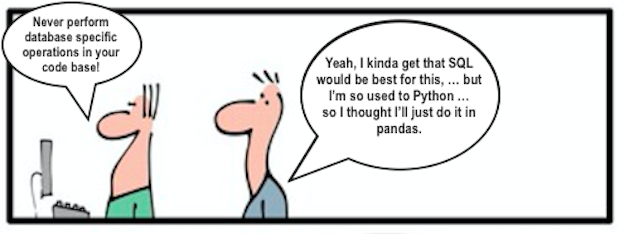

Both Series and DataFrames have a tremendous amount of power. We can use the dir function to uncover all the attributes and methods of a Series. Additionally, we can find the number of attributes and methods common to both Series and DataFrames. Both of these objects share the vast majority of attribute and method names

In [45]:
import pandas as pd
import numpy as np
s_attr_methods = set(dir(pd.Series))
len(s_attr_methods)

455

In [46]:
df_attr_methods = set(dir(pd.DataFrame))
len(df_attr_methods)

462

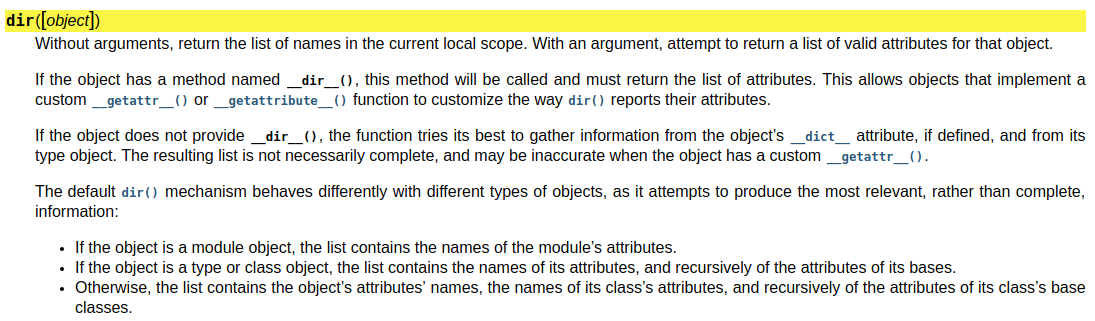

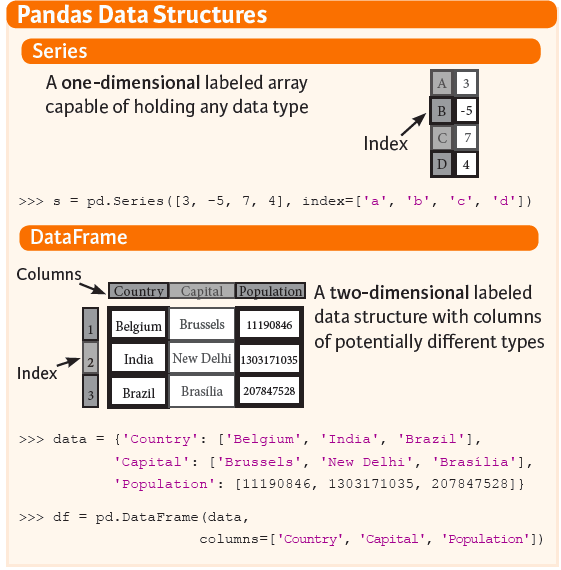

# Series


A Series is a one-dimensional object that can hold any data type such as integers, floats and strings. Let’s take a list of items as an input argument and create a Series object for that list.

In [47]:
data = pd.Series(np.random.randint(0,10,10))
data

0    5
1    0
2    6
3    5
4    1
5    3
6    5
7    5
8    0
9    8
dtype: int64

In [48]:
x = pd.Series([6,10,4,6], index=['a', 'b', 'c', 'd'])
x

a     6
b    10
c     4
d     6
dtype: int64

In [49]:
x = pd.Series([6,3,4,6])
x[x>4]

0    6
3    6
dtype: int64

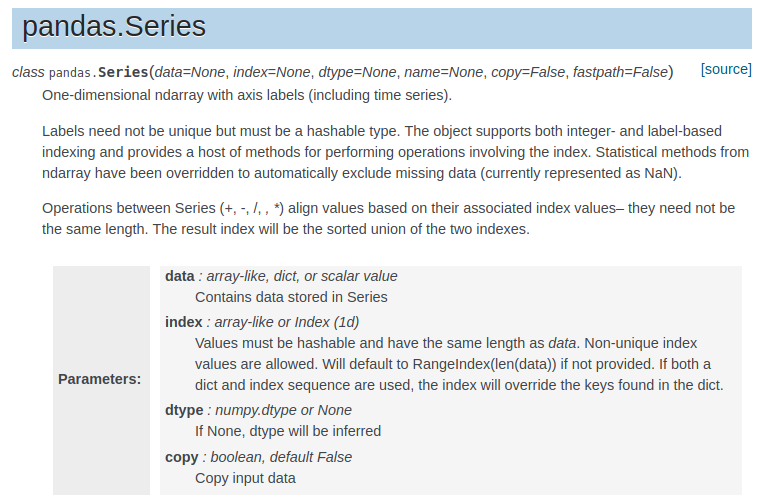

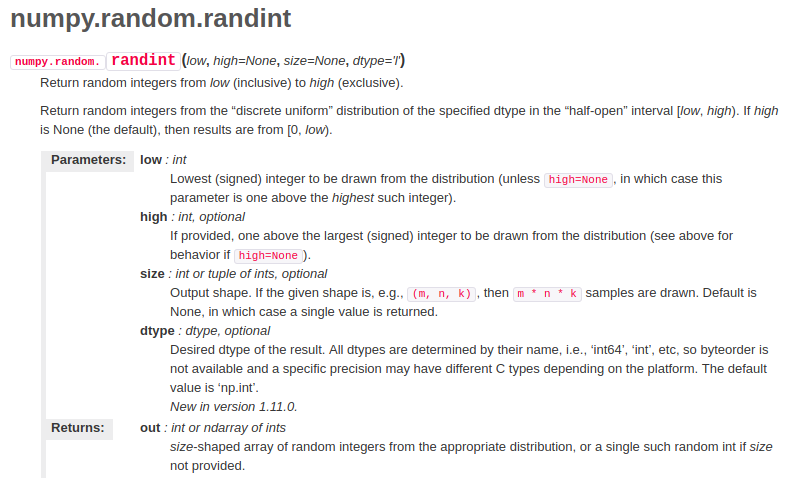

# DataFrame

A DataFrame is a two dimensional object that can have columns with potential different types. Different kind of inputs include dictionaries, lists, series, and even another DataFrame.

In [50]:
dates = pd.date_range('20170505', periods = 8)
dates

DatetimeIndex(['2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12'],
              dtype='datetime64[ns]', freq='D')

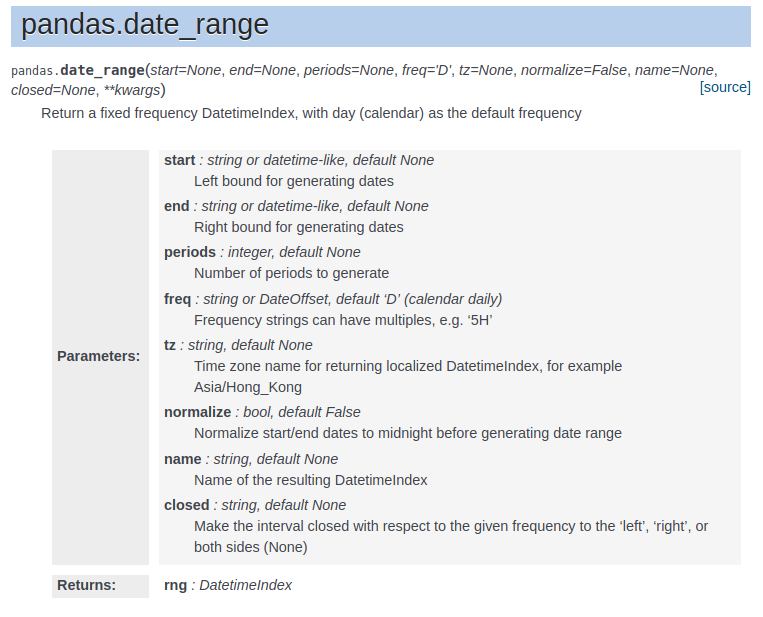

In [51]:
df = pd.DataFrame(np.random.randn(8,3), index=dates, columns=list('abc'))
df

a         b         c
2017-05-05  0.428344  0.204008  0.002471
2017-05-06  1.144136  1.101220 -1.273053
2017-05-07  0.370791 -0.812902  2.282079
2017-05-08  1.070810 -0.601682 -1.337729
2017-05-09 -0.914450  0.709892 -0.453859
2017-05-10 -0.607609  0.367447  1.147617
2017-05-11  1.180601 -0.289478 -0.524395
2017-05-12  0.916301 -1.498124 -0.304617

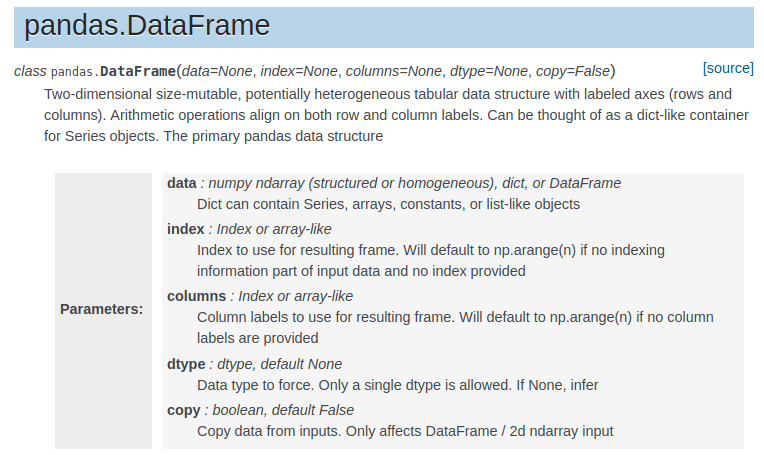

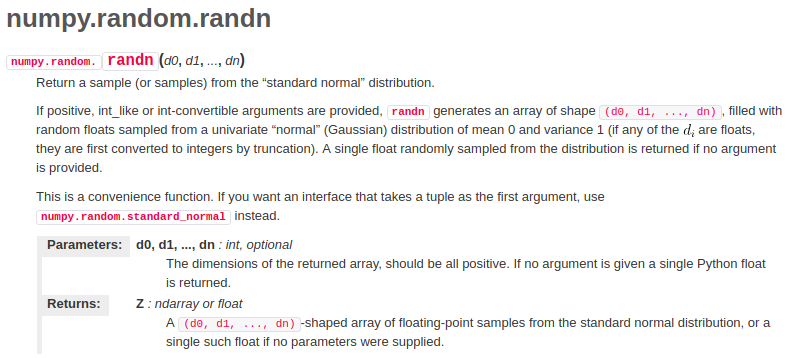

In [52]:
df.shape

(8, 3)

In [53]:
 df.describe()

a         b         c
count  8.000000  8.000000  8.000000
mean   0.448616 -0.102453 -0.057686
std    0.811122  0.858595  1.223709
min   -0.914450 -1.498124 -1.337729
25%    0.126191 -0.654487 -0.711560
50%    0.672323 -0.042735 -0.379238
75%    1.089141  0.453058  0.288758
max    1.180601  1.101220  2.282079

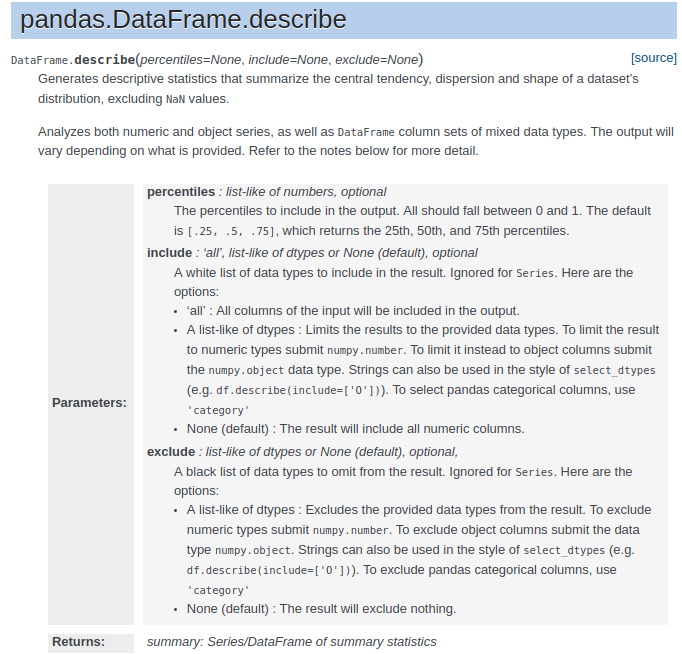

We can also apply functions to the data like cumulative sum, view histograms, merging DataFrames, concatenating and reshaping DataFrames.



In [54]:
df.apply(np.cumsum)

a         b         c
2017-05-05  0.428344  0.204008  0.002471
2017-05-06  1.572481  1.305228 -1.270582
2017-05-07  1.943272  0.492325  1.011497
2017-05-08  3.014081 -0.109357 -0.326231
2017-05-09  2.099631  0.600535 -0.780090
2017-05-10  1.492022  0.967982  0.367527
2017-05-11  2.672623  0.678503 -0.156868
2017-05-12  3.588924 -0.819621 -0.461486

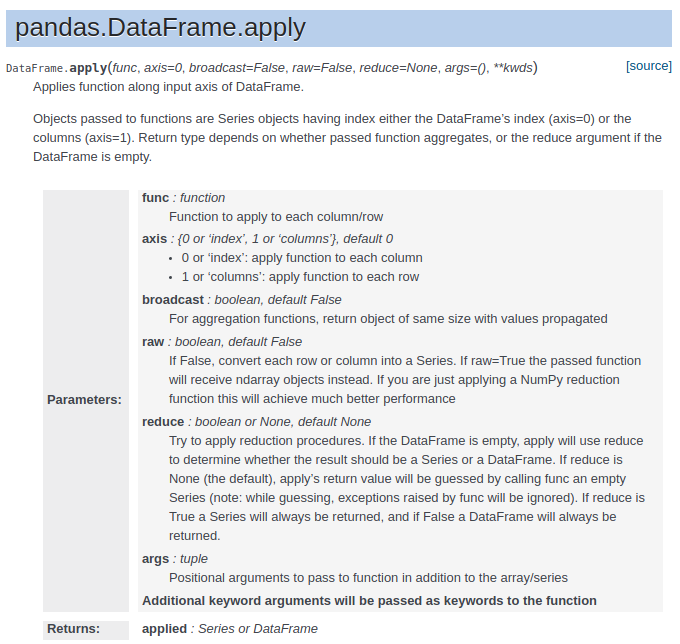

In [55]:
frame = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'], 
                        'price': [12.33,11.44,33.21,13.23,33.62]})
frame

id  price
0     ball  12.33
1   pencil  11.44
2      pen  33.21
3      mug  13.23
4  ashtray  33.62

# Indexing and Selecting Data

* The axis labeling information in pandas objects serves many purposes:

    * Identifies data (i.e. provides metadata) using known indicators, important for analysis, visualization, and interactive console display
    * Enables automatic and explicit data alignment
    * Allows intuitive getting and setting of subsets of the data set

In this section, we will focus on the final point: namely, how to slice, dice, and generally get and set subsets of pandas objects.

## Different Choices for Indexing

* Pandas now supports three types of Multi-axes indexing; the three types are mentioned in the following table −

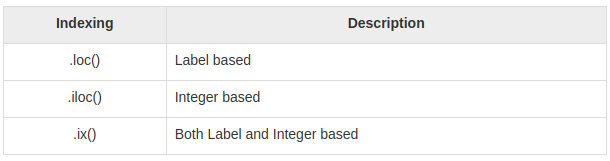

### .loc()

* Pandas provide various methods to have purely label based indexing.
* When slicing, the start bound is also included. 
* Integers are valid labels, but they refer to the label and not the position.

* .loc() has multiple access methods like −

    * A single scalar label
    * A list of labels
    * A slice object
    * A Boolean array

* loc takes two single/list/range operator separated by ','. The first one indicates the row and the second one indicates columns.

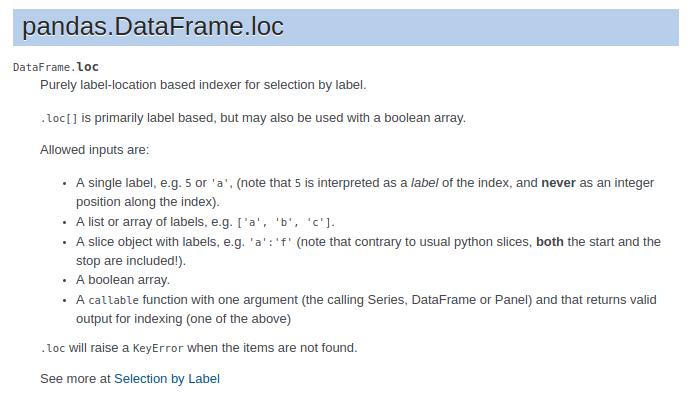

**Here we construct a simple data set to use for illustrating the indexing functionality:**

In [56]:
#import the pandas library and aliasing as pd
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(8, 4),
index = ['a','b','c','d','e','f','g','h'], columns = ['A', 'B', 'C', 'D'])

#select all rows for a specific column
print (df.loc[:,'A'])

a   -0.643082
b    0.595854
c    0.885610
d    0.795729
e    1.518132
f   -1.189038
g   -0.616785
h   -1.261046
Name: A, dtype: float64


In [57]:
# Select all rows for multiple columns, say list[]
print (df.loc[:,['A','C']])

          A         C
a -0.643082  1.288405
b  0.595854  0.581867
c  0.885610 -0.038795
d  0.795729  0.649956
e  1.518132 -0.069817
f -1.189038  2.163794
g -0.616785  0.293696
h -1.261046  0.155319


In [58]:
# Select few rows for multiple columns, say list[]
print (df.loc[['a','b','f','h'],['A','C']])

          A         C
a -0.643082  1.288405
b  0.595854  0.581867
f -1.189038  2.163794
h -1.261046  0.155319


In [59]:
# Select range of rows for all columns
print (df.loc['a':'h'])

          A         B         C         D
a -0.643082 -0.663748  1.288405 -0.437311
b  0.595854  0.226158  0.581867 -1.046775
c  0.885610  1.319402 -0.038795 -0.910051
d  0.795729 -0.613767  0.649956  1.301367
e  1.518132 -0.120568 -0.069817 -0.323231
f -1.189038  1.067991  2.163794  0.927320
g -0.616785  0.256839  0.293696 -0.152905
h -1.261046  0.953213  0.155319 -0.269112


In [60]:
# for getting values with a boolean array
print (df.loc['a']>0)

A    False
B    False
C     True
D    False
Name: a, dtype: bool


* You can pass a list of columns to [ ] to select columns in that order. If a column is not contained in the DataFrame, an exception will be raised. Multiple columns can also be set in this manner:

In [61]:
df[['B', 'A']] = df[['A', 'B']]
df

A         B         C         D
a -0.663748 -0.643082  1.288405 -0.437311
b  0.226158  0.595854  0.581867 -1.046775
c  1.319402  0.885610 -0.038795 -0.910051
d -0.613767  0.795729  0.649956  1.301367
e -0.120568  1.518132 -0.069817 -0.323231
f  1.067991 -1.189038  2.163794  0.927320
g  0.256839 -0.616785  0.293696 -0.152905
h  0.953213 -1.261046  0.155319 -0.269112

### .iloc()

* Pandas provide various methods in order to get purely integer based indexing.
* Like python and numpy, these are 0-based indexing.

* The various access methods are as follows −

    * An Integer
    * A list of integers
    * A range of values

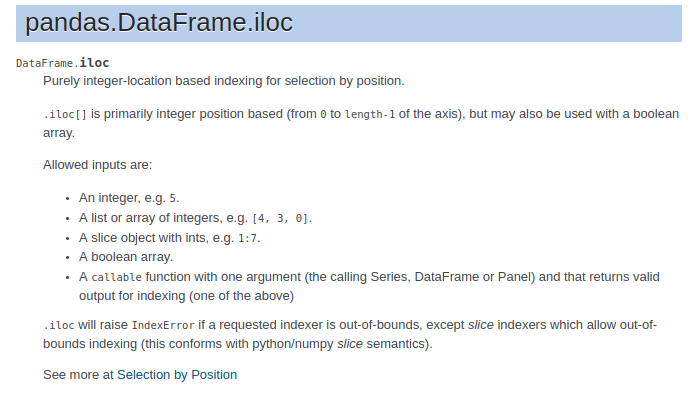

**Here we construct a simple data set to use for illustrating the indexing functionality:**

In [62]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ['A', 'B', 'C', 'D'])

# select all rows for a specific column
print (df.iloc[:4])

          A         B         C         D
0 -0.870577  0.179049  0.642981  0.968185
1  1.253474 -0.340001  1.786364  0.104379
2 -0.673683  0.155722  0.867156  1.619398
3  0.114168  0.530403  0.159446  0.704981


In [63]:
# Integer slicing
print (df.iloc[:4])
print (df.iloc[1:5, 2:4])

          A         B         C         D
0 -0.870577  0.179049  0.642981  0.968185
1  1.253474 -0.340001  1.786364  0.104379
2 -0.673683  0.155722  0.867156  1.619398
3  0.114168  0.530403  0.159446  0.704981
          C         D
1  1.786364  0.104379
2  0.867156  1.619398
3  0.159446  0.704981
4  0.028831  0.727024


In [64]:
# Slicing through list of values
print (df.iloc[[1, 3, 5], [1, 3]])
print (df.iloc[1:3, :])
print (df.iloc[:,1:3])

          B         D
1 -0.340001  0.104379
3  0.530403  0.704981
5 -0.007369  0.010124
          A         B         C         D
1  1.253474 -0.340001  1.786364  0.104379
2 -0.673683  0.155722  0.867156  1.619398
          B         C
0  0.179049  0.642981
1 -0.340001  1.786364
2  0.155722  0.867156
3  0.530403  0.159446
4 -0.404473  0.028831
5 -0.007369  0.252558
6  0.304541  0.434265
7 -1.122470  0.637767


# I/O Operations

* The pandas I/O API is a set of top level reader functions accessed like pd.read_csv() that generally return a pandas object. 
* The corresponding writer functions are object methods that are accessed like df.to_csv()

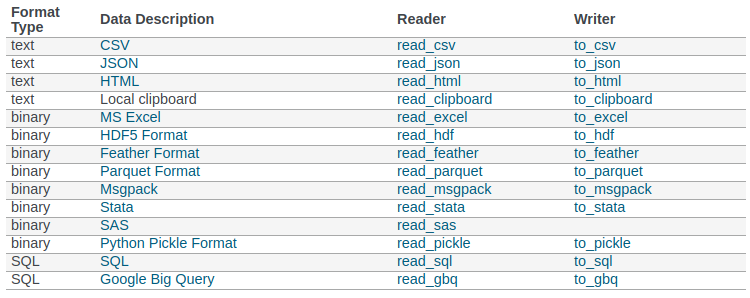

## Reading Data in CSV ,TABLE and TEXT

In [1]:
import pandas as pd
csv_data = pd.read_csv('data/winequality-red.csv')
csv_data.head()

fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"
0   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5                                                                                                                     
1   7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5                                                                                                                     
2  7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...                                                                                                                     
3  11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...                                                                                                                     
4   7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5

* comma is a default delimiter for csv file but in this csv file ; is the delimiter To fix this

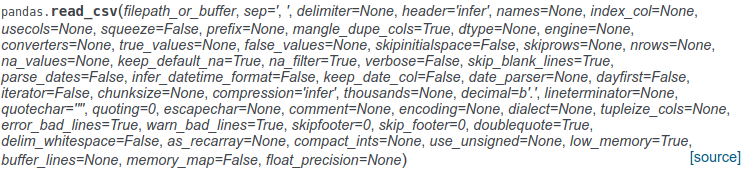
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

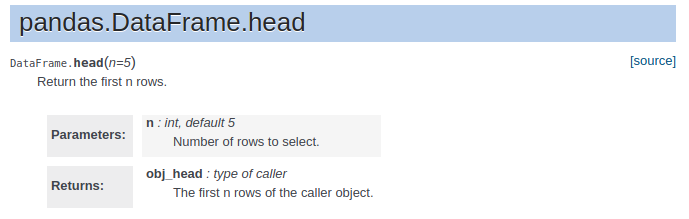

In [2]:
csv_data = pd.read_csv('data/winequality-red.csv',delimiter=';')

In [3]:
csv_data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

In [4]:
csv_data.tail(3)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
1596     11.0        6  
1597     10.2        5  
1598     11.0        6

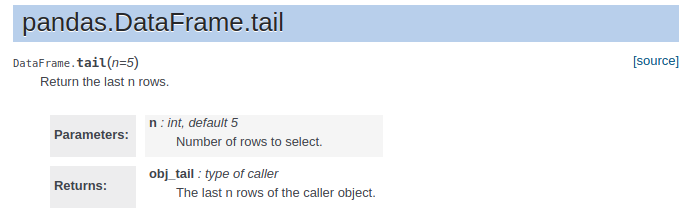

In [5]:
csv_data = pd.read_table('data/winequality-red.csv',sep=';')
csv_data.head(2)

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70          0.0             1.9      0.076   
1            7.8              0.88          0.0             2.6      0.098   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   

   alcohol  quality  
0      9.4        5  
1      9.8        5

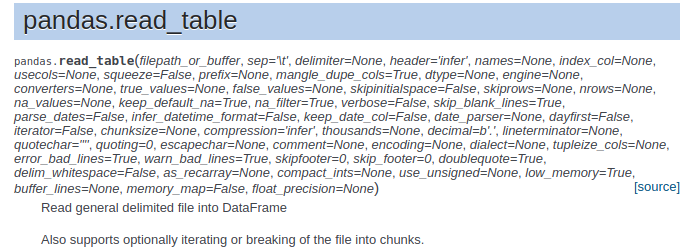
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html

**Read table from text**

* In other cases, it is possible that the files on which to parse the data do not show separators well defined as a comma or a semicolon. 
* In these cases, the **regular expressions** come to our aid.
* In fact, we can specify a **regexp** within the **read_table()** function using the sep option.



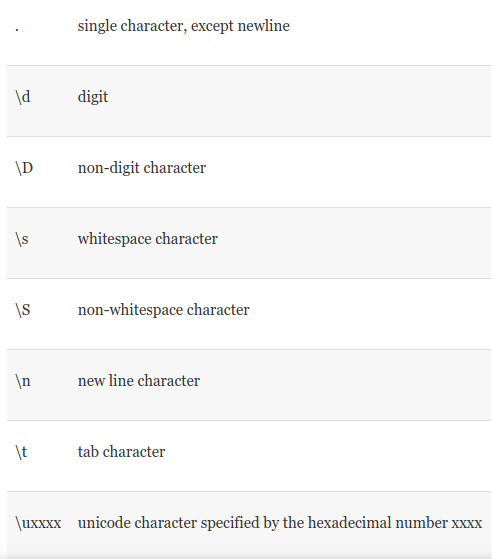

In [6]:
txt_data = pd.read_table('data/number.txt')
txt_data.head()

,Unnamed: 0,ball,mug,paper,pen,pencil
0                  0,blue,6.0,0,0,6.0,0
1                     1,green,0,0,0,0,0
2                       2,red,0,0,0,0,0
3               3,white,20.0,0,0,20.0,0
4              4,yellow,19.0,0,0,19.0,0

In [7]:
txt_data = pd.read_table('data/number.txt',sep='[,]*',header=None)
txt_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:2227: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:2229: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


0           1     2    3      4     5       6
0  NaN  Unnamed: 0  ball  mug  paper   pen  pencil
1  0.0        blue   6.0    0      0   6.0       0
2  1.0       green     0    0      0     0       0
3  2.0         red     0    0      0     0       0
4  3.0       white  20.0    0      0  20.0       0

Remember to use the header option set to None whenever the column headings are not present in the TXT file

## Statistical Analysis

* A large number of methods collectively compute descriptive statistics and other related operations on DataFrame.
* Most of these are aggregations like sum(), mean(), but some of them, like sumsum(), produce an object of the same size.
* Generally speaking, these methods take an axis argument, just like ndarray.{sum, std, ...}, but the axis can be specified by name or integer

    * DataFrame − “index” (axis=0, default), “columns” (axis=1)

* Let us create a DataFrame and use this object throughout this chapter for all the operations.

In [72]:
import pandas as pd
import numpy as np

#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)
print (df)

    Age    Name  Rating
0    25     Tom    4.23
1    26   James    3.24
2    25   Ricky    3.98
3    23     Vin    2.56
4    30   Steve    3.20
5    29   Smith    4.60
6    23    Jack    3.80
7    34     Lee    3.78
8    40   David    2.98
9    30  Gasper    4.80
10   51  Betina    4.10
11   46  Andres    3.65


**sum()**
* Returns the sum of the values for the requested axis. By default, axis is index (axis=0).

In [73]:
print (df.sum())

Age                                                     382
Name      TomJamesRickyVinSteveSmithJackLeeDavidGasperBe...
Rating                                                44.92
dtype: object


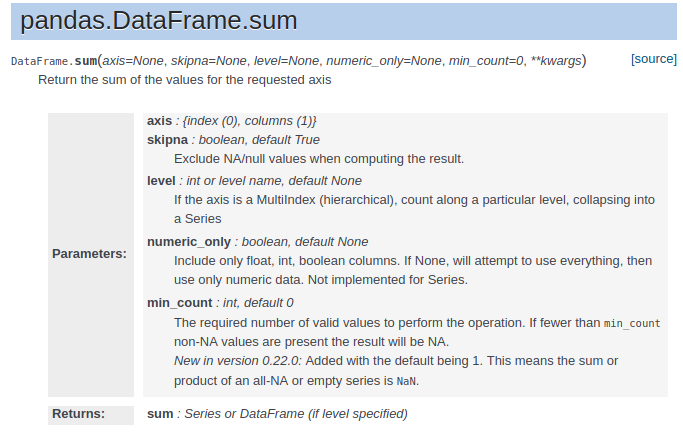

**Axis=1**

In [74]:
print(df.sum(1))

0     29.23
1     29.24
2     28.98
3     25.56
4     33.20
5     33.60
6     26.80
7     37.78
8     42.98
9     34.80
10    55.10
11    49.65
dtype: float64


**mean()**
* Returns the average value

In [75]:
print (df.mean())

Age       31.833333
Rating     3.743333
dtype: float64


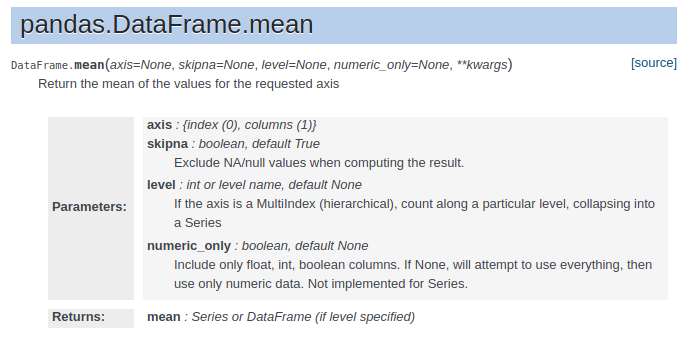

**std()**
* Returns the Bressel standard deviation of the numerical columns.

In [76]:
print (df.std())

Age       9.232682
Rating    0.661628
dtype: float64


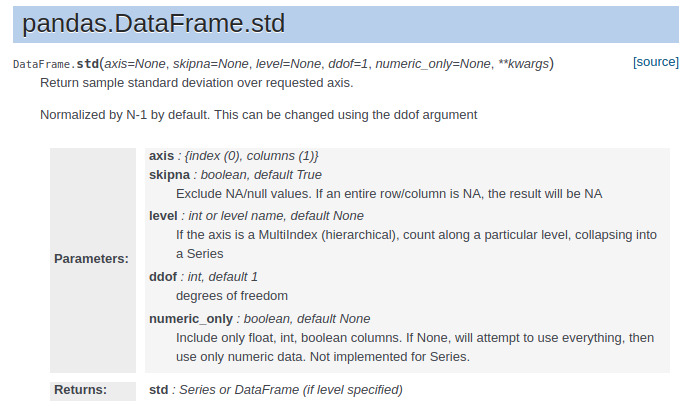

* Let us now understand the functions under Descriptive Statistics in Python Pandas. 
* The following table list down the important functions −

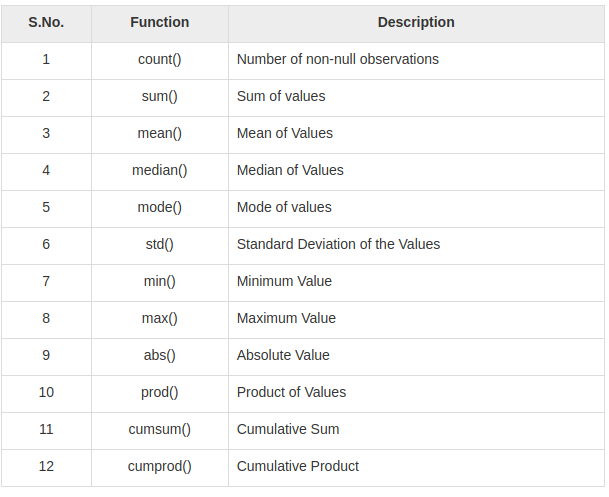

**Note** − Since DataFrame is a Heterogeneous data structure. Generic operations don’t work with all functions.

* Functions like sum(), cumsum() work with both numeric and character (or) string data elements without any error. Though n practice, character aggregations are never used generally, these functions do not throw any exception.

* Functions like abs(), cumprod() throw exception when the DataFrame contains character or string data because such operations cannot be performed.

## Dealing with date and time

### Time Delta

* Timedeltas are differences in times, expressed in difference units, for example, days, hours, minutes, seconds. They can be both positive and negative.
* We can create Timedelta objects using various arguments as shown below −

**String**
* By passing a string literal, we can create a timedelta object.

In [77]:
import pandas as pd

print (pd.Timedelta('2 days 2 hours 15 minutes 30 seconds'))

2 days 02:15:30


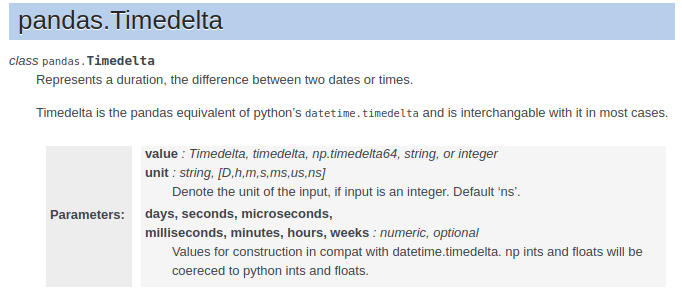

**Integer**
* By passing an integer value with the unit, an argument creates a Timedelta object.

In [78]:
import pandas as pd

print (pd.Timedelta(6,unit='h'))

0 days 06:00:00


**Data Offsets**
* Data offsets such as - weeks, days, hours, minutes, seconds, milliseconds, microseconds, nanoseconds can also be used in construction.

In [79]:
import pandas as pd

print (pd.Timedelta(days=2))

2 days 00:00:00


**Operations**

* You can operate on Series/ DataFrames and construct timedelta64[ns] Series through subtraction operations on datetime64[ns] Series, or Timestamps.

* Let us now create a DataFrame with Timedelta and datetime objects and perform some arithmetic operations on it −

In [80]:
import pandas as pd

s = pd.Series(pd.date_range('2012-1-1', periods=3, freq='D'))
td = pd.Series([ pd.Timedelta(days=i) for i in range(3) ])
df = pd.DataFrame(dict(A = s, B = td))
print (df)

           A      B
0 2012-01-01 0 days
1 2012-01-02 1 days
2 2012-01-03 2 days


**Addition Operations**

In [81]:
df['C']=df['A']+df['B']

print (df)

           A      B          C
0 2012-01-01 0 days 2012-01-01
1 2012-01-02 1 days 2012-01-03
2 2012-01-03 2 days 2012-01-05


### Date

* Extending the Time series, Date functionalities play major role in financial data analysis. 
* While working with Date data, we will frequently come across the following −

    * Generating sequence of dates
    * Convert the date series to different frequencies

**Create a Range of Dates**

* Using the date.range() function by specifying the periods and the frequency, we can create the date series. 
* By default, the frequency of range is Days.

In [82]:
import pandas as pd
print (pd.date_range('1/1/2011', periods=5))

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05'],
              dtype='datetime64[ns]', freq='D')


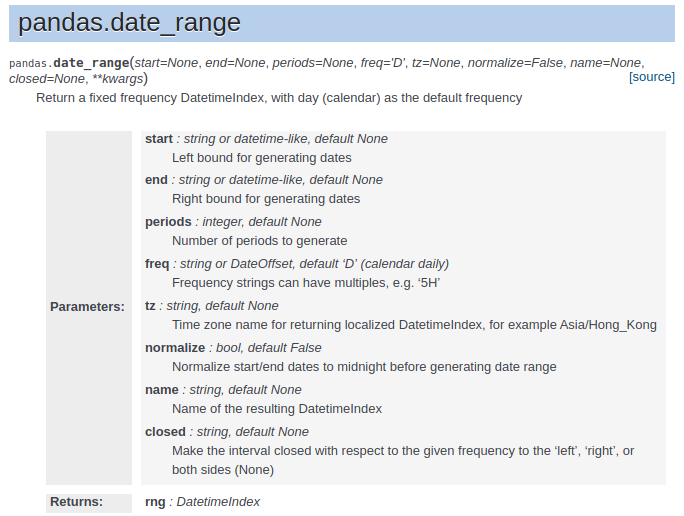

**Change the Date Frequency**

In [83]:
print (pd.date_range('1/1/2011', periods=5,freq='M'))

DatetimeIndex(['2011-01-31', '2011-02-28', '2011-03-31', '2011-04-30',
               '2011-05-31'],
              dtype='datetime64[ns]', freq='M')


**bdate_range**
* bdate_range() stands for business date ranges. Unlike date_range(), it excludes Saturday and Sunday.

In [84]:
print (pd.bdate_range('2/1/2011', periods=5))

DatetimeIndex(['2011-02-01', '2011-02-02', '2011-02-03', '2011-02-04',
               '2011-02-07'],
              dtype='datetime64[ns]', freq='B')


* Observe, after 4rd Feb, the date jumps to 7th feb excluding 5th and 6th. Just check your calendar for the days.

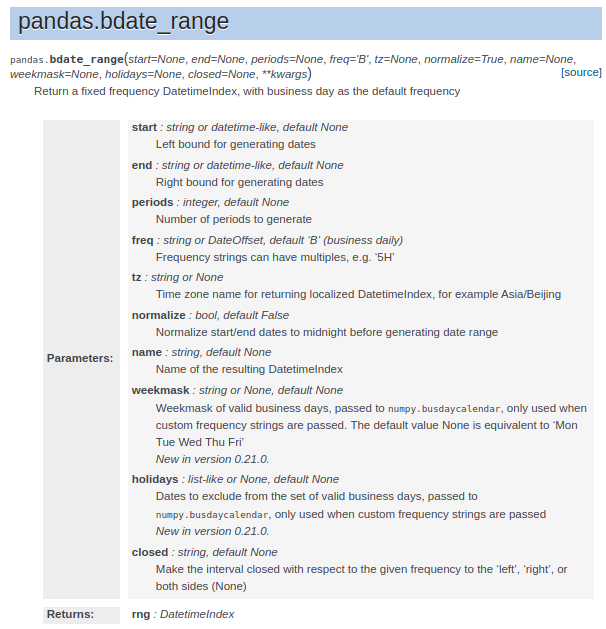

**Offset Aliases**
* A number of string aliases are given to useful common time series frequencies. We will refer to these aliases as offset aliases.

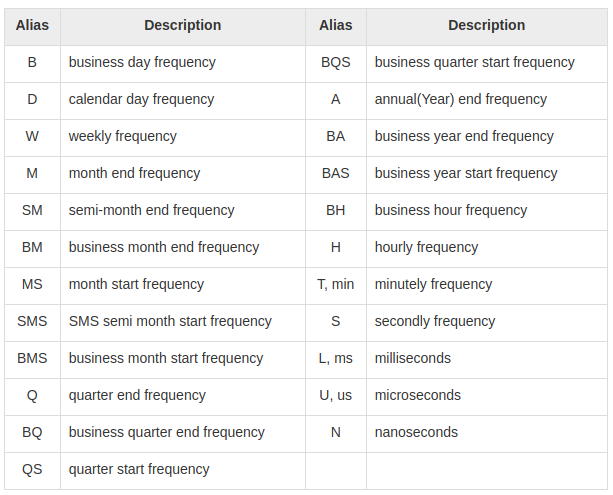

#  Data Manipulation

 The manipulation of the data has the purpose of preparing the data so that they can be more easily subjected to analysis. In fact, their manipulation will depend a lot on purposes of those who must carry out the analysis, and it will be performed for making more explicit the information we are looking for. Especially in preparation for the next phase, the data must be ready to the data visualization that will follow in the next chapter.

The three phases of data manipulation are

 - Data preparation
 - Data transformation
 - Data aggregation

# Data Preparation


Before we start manipulating data itself, it is necessary to prepare the data and assemble them in the form of data structures such that they can be manipulated later with the tools made available by the pandas library.

The different procedures for data preparation are listed below.

- loading
- assembling
  - merging
  - concatenating
  - combining
- reshaping (pivoting)
- removing

## Merging

The merging operation, which corresponds to the JOIN operation for those who are familiar with SQL, consists of a combination of data through the connection of rows using one or more keys.

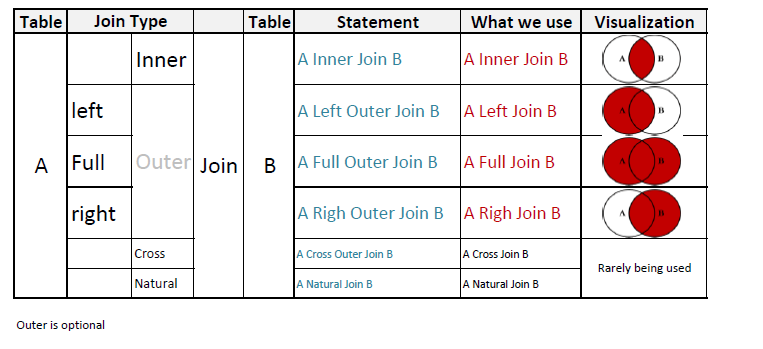

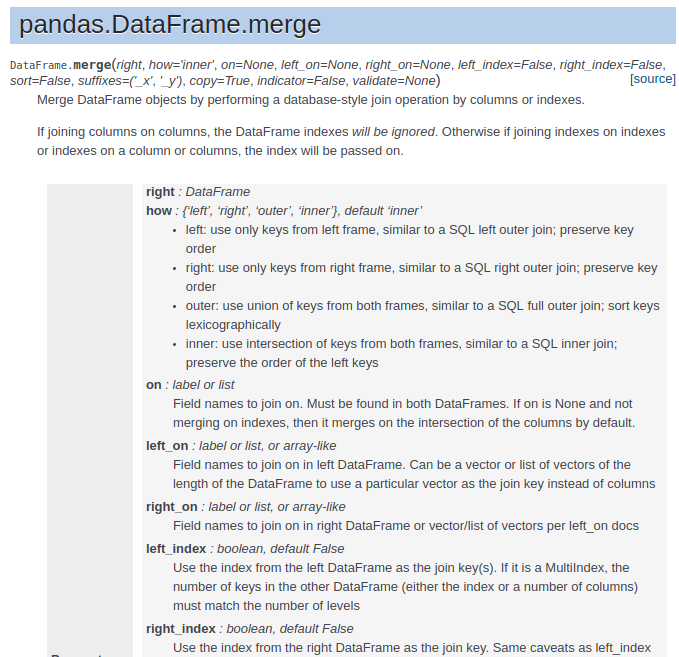

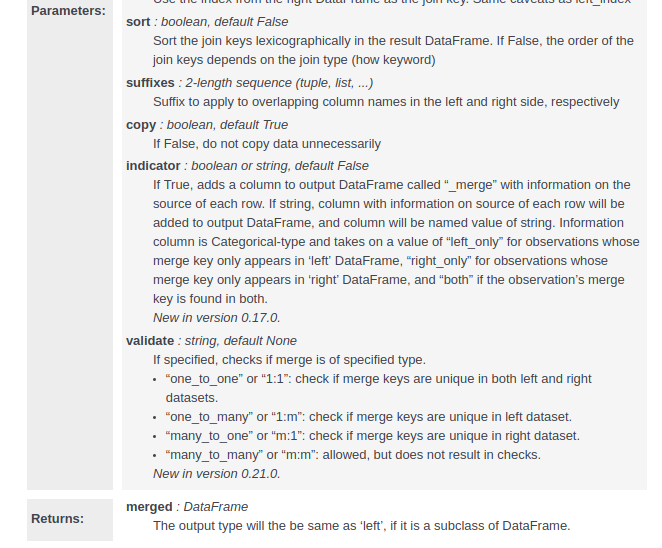

In [85]:
import numpy as np
import pandas as pd
frame1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],'price': [12.33,11.44,33.21,13.23,33.62]})
frame2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],'color': ['white','red','red','black']})

In [86]:
frame1

id  price
0     ball  12.33
1   pencil  11.44
2      pen  33.21
3      mug  13.23
4  ashtray  33.62

In [87]:
frame2

color      id
0  white  pencil
1    red  pencil
2    red    ball
3  black     pen

In [88]:
pd.merge(frame1,frame2)

id  price  color
0    ball  12.33    red
1  pencil  11.44  white
2  pencil  11.44    red
3     pen  33.21  black

In [89]:
frame1 = pd.DataFrame( {'id':['ball','pencil','pen','mug','ashtray'],'color': ['white','red','red','black','green'],'brand': ['OMG','ABC','ABC','POD','POD']})

In [90]:
frame2 = pd.DataFrame( {'id':['pencil','pencil','ball','pen'],'brand': ['OMG','POD','ABC','POD']})

In [91]:
frame1

brand  color       id
0   OMG  white     ball
1   ABC    red   pencil
2   ABC    red      pen
3   POD  black      mug
4   POD  green  ashtray

In [92]:
frame2

brand      id
0   OMG  pencil
1   POD  pencil
2   ABC    ball
3   POD     pen

In [93]:
pd.merge(frame1,frame2)

Empty DataFrame
Columns: [brand, color, id]
Index: []

It is necessary to **explicitly define** the criterion of merging that pandas must follow, specifying the name of the key column in the **on** option.

In [94]:
pd.merge(frame1,frame2,on='id')

brand_x  color      id brand_y
0     OMG  white    ball     ABC
1     ABC    red  pencil     OMG
2     ABC    red  pencil     POD
3     ABC    red     pen     POD

In [95]:
pd.merge(frame1,frame2,on='brand')

brand  color     id_x    id_y
0   OMG  white     ball  pencil
1   ABC    red   pencil    ball
2   ABC    red      pen    ball
3   POD  black      mug  pencil
4   POD  black      mug     pen
5   POD  green  ashtray  pencil
6   POD  green  ashtray     pen

To have two **DataFrames** in which the key columns do not have the same name. To remedy this situation, we have to use the **left_on** and **right_on** options that specify the key column for the first and for the second DataFrame. Now we can see an example.

In [96]:
frame2.columns = ['brand','item'] # rename the id to item

In [97]:
frame2

brand    item
0   OMG  pencil
1   POD  pencil
2   ABC    ball
3   POD     pen

In [98]:
pd.merge(frame1,frame2,left_on='id',right_on='item')

brand_x  color      id brand_y    item
0     OMG  white    ball     ABC    ball
1     ABC    red  pencil     OMG  pencil
2     ABC    red  pencil     POD  pencil
3     ABC    red     pen     POD     pen

By default, the **merge( )** function performs an **inner join**; the keys in the result are the result of an intersection.other option are **left_join**,**right_join**,**outer_join**.The outer join produces the union of all keys, combining the effect of a left join with a right join

In [99]:
pd.merge(frame1,frame2,left_on='id',right_on='item',how='outer')

brand_x  color       id brand_y    item
0     OMG  white     ball     ABC    ball
1     ABC    red   pencil     OMG  pencil
2     ABC    red   pencil     POD  pencil
3     ABC    red      pen     POD     pen
4     POD  black      mug     NaN     NaN
5     POD  green  ashtray     NaN     NaN

In [100]:
pd.merge(frame1,frame2,left_on='id',right_on='item',how='left')

brand_x  color       id brand_y    item
0     OMG  white     ball     ABC    ball
1     ABC    red   pencil     OMG  pencil
2     ABC    red   pencil     POD  pencil
3     ABC    red      pen     POD     pen
4     POD  black      mug     NaN     NaN
5     POD  green  ashtray     NaN     NaN

In [101]:
pd.merge(frame1,frame2,left_on='id',right_on='item',how='right')

brand_x  color      id brand_y    item
0     OMG  white    ball     ABC    ball
1     ABC    red  pencil     OMG  pencil
2     ABC    red  pencil     POD  pencil
3     ABC    red     pen     POD     pen

To make the merge of multiple keys, we simply just add a list to the on option.


In [102]:
frame2.columns = ['brand','id']
pd.merge(frame1,frame2,on=['id','brand'],how='outer')

brand  color       id
0   OMG  white     ball
1   ABC    red   pencil
2   ABC    red      pen
3   POD  black      mug
4   POD  green  ashtray
5   OMG    NaN   pencil
6   POD    NaN   pencil
7   ABC    NaN     ball
8   POD    NaN      pen

### Merging on Index



In some cases, **instead of considering the columns of a DataFrame as keys**, the **indexes** could be used as **keys** on which to make the criteria for **merging**. Then in order to decide which indexes to consider, **set the left_index or right_index options to True to activate them**, with the ability to activate them both.



In [103]:
pd.merge(frame1,frame2,right_index=True, left_index=True)

brand_x  color    id_x brand_y    id_y
0     OMG  white    ball     OMG  pencil
1     ABC    red  pencil     POD  pencil
2     ABC    red     pen     ABC    ball
3     POD  black     mug     POD     pen

But the DataFrame objects have a **join()** function which is much more convenient when we want to do the **merging by indexes**. It can also be used to combine many DataFrame objects having the same or the same indexes but with columns not overlapping

**frame1.join(frame2)** ---- >error code because some columns of the frame1 have the same name of frame2. Then rename the columns of frame2 before launching the join( ) function.



In [104]:
frame2.columns = ['brand2','id2']

In [105]:
frame1.join(frame2)

brand  color       id brand2     id2
0   OMG  white     ball    OMG  pencil
1   ABC    red   pencil    POD  pencil
2   ABC    red      pen    ABC    ball
3   POD  black      mug    POD     pen
4   POD  green  ashtray    NaN     NaN

## Combining

There is  situation in which there is combination of data that cannot be obtained either with merging or with concatenation. Take the case in which we want the two datasets to have indexes that overlap in their entirety or at least partially.

One applicable function to Series is combine_first(), which performs this kind of operation along with an data alignment.

In [106]:
series_data = pd.Series(['A','B','C','D','E'],index=[1,2,3,4,5])
series_data

1    A
2    B
3    C
4    D
5    E
dtype: object

In [107]:
series_data1 = pd.Series(['F','G','H','I'],index=[2,4,5,6])
series_data1

2    F
4    G
5    H
6    I
dtype: object

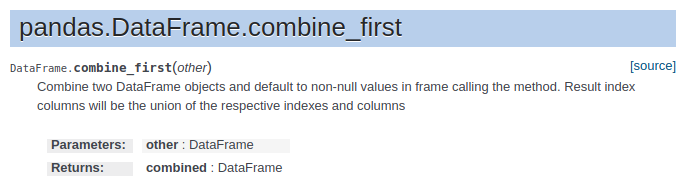

In [108]:
 series_data.combine_first(series_data1)

1    A
2    B
3    C
4    D
5    E
6    I
dtype: object

In [109]:
series_data1.combine_first(series_data)

1    A
2    F
3    C
4    G
5    H
6    I
dtype: object

Instead, if we want a partial overlap, we can specify only the portion of the Series we want to overlap

In [110]:
series_data[:3].combine_first(series_data1[:3])

1    A
2    B
3    C
4    G
5    H
dtype: object

## Pivoting

* In addition to assembling the data in order to unify the values collected from different sources, another fairly common operation is **pivoting**. 
* In fact, arrangement of the values by row or by column is not always suited to our goals. Sometimes we would like to rearrange the data carrying column values on rows or vice versa.

## Pivoting with Hierarchical Indexing

DataFrame can support hierarchical indexing. This feature can be exploited to rearrange the data in a DataFrame. In the context of pivoting we have two basic operations:

 - **stacking**: rotates or pivots the data structure converting columns to rows
 - **unstacking**: converts rows into columns

In [111]:
frame1 = pd.DataFrame(np.arange(9).reshape(3,3),index=['white','black','red'],columns=['ball','pen','pencil'])

In [112]:
frame1

ball  pen  pencil
white     0    1       2
black     3    4       5
red       6    7       8

Using the **stack()** function on the DataFrame, we will get the pivoting of the columns in rows, thus producing a Series:

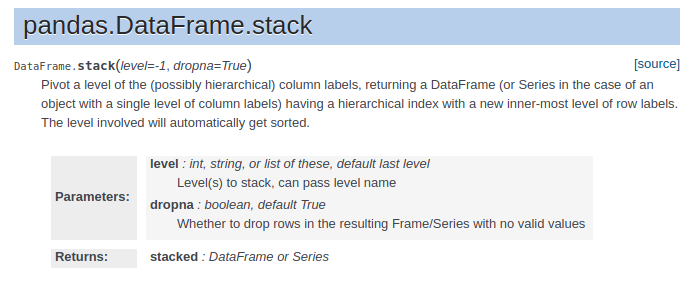

In [113]:
frame_stack = frame1.stack()
frame_stack

white  ball      0
       pen       1
       pencil    2
black  ball      3
       pen       4
       pencil    5
red    ball      6
       pen       7
       pencil    8
dtype: int64

* we can also do the unstack on a different level, specifying the number of levels or its name as the argument of the function.

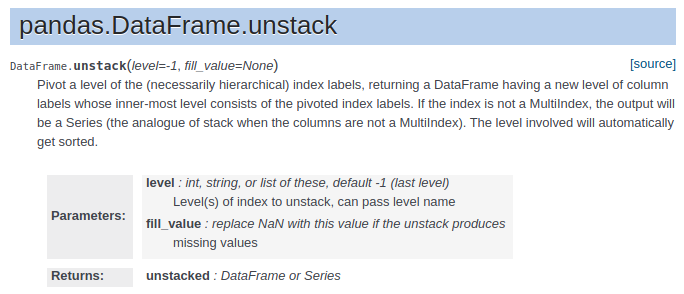

In [114]:
frame_stack.unstack()    

ball  pen  pencil
white     0    1       2
black     3    4       5
red       6    7       8

In [115]:
frame_stack.unstack(0)

white  black  red
ball        0      3    6
pen         1      4    7
pencil      2      5    8

## Pivoting from “Long” to “Wide” Format



* The most common way to store data sets is produced by the punctual registration of data that will fill a line of the text file, for example, CSV, or a table of a database.
* This happens especially when we have instrumental readings, calculation results iterated over time, or the simple manual input of a series of values.
* A similar case of these files is for example the logs file, which is filled line by line by accumulating data in it.

In [116]:
longframe = pd.DataFrame({ 'color':['white','white','white',
                                  'red','red','red',
                                  'black','black','black'],
                         'item':['ball','pen','mug',
                                 'ball','pen','mug',
                                 'ball','pen','mug'],
                         'value': np.random.rand(9)})

In [117]:
longframe

color  item     value
0  white  ball  0.118190
1  white   pen  0.276524
2  white   mug  0.739486
3    red  ball  0.524816
4    red   pen  0.623624
5    red   mug  0.425133
6  black  ball  0.368192
7  black   pen  0.194278
8  black   mug  0.411711

* Instead of the long format, there is another way to arrange the data in a table that is called wide.
* In this regard, pandas gives us a function that allows us to make a transformation of a DataFrame from the long type to the wide type.
* This function is **pivot()** and it accepts arguments as the column, or columns, which will assume the role of key.

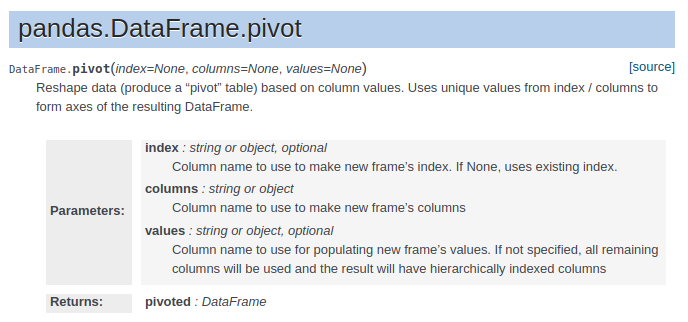

In [118]:
wideframe = longframe.pivot('color','item')

In [119]:
wideframe

value                    
item       ball       mug       pen
color                              
black  0.368192  0.411711  0.194278
red    0.524816  0.425133  0.623624
white  0.118190  0.739486  0.276524

## Removing

In [120]:
frame1

ball  pen  pencil
white     0    1       2
black     3    4       5
red       6    7       8

In [121]:
del frame1['pen']

In [122]:
frame1

ball  pencil
white     0       2
black     3       5
red       6       8

Instead, to remove an unwanted row, we have to use the drop() function with the label of the corresponding index as argument.



In [123]:
frame1.drop('red')

ball  pencil
white     0       2
black     3       5

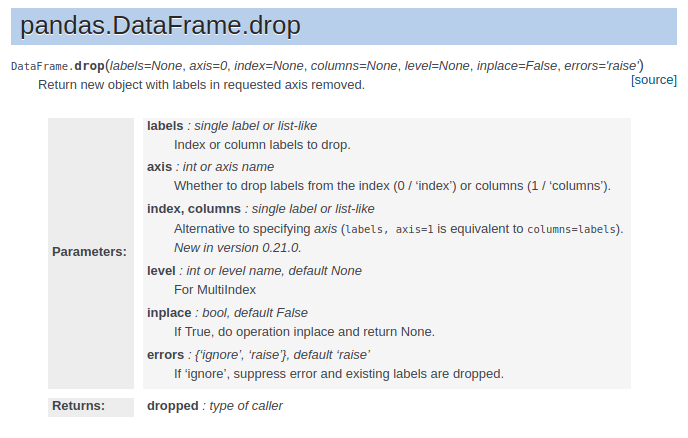

# Data Transformation



* After arranging the form of data and their disposal within the data structure, it is important to transform their values.
* Data transformation is the process of converting data or information from one format to another, usually from the format of a source system into the required format of a new destination system.

## Removing Duplicates



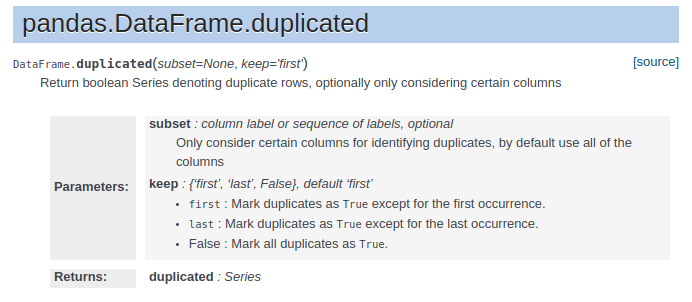

In [124]:
dframe = pd.DataFrame({ 'color': ['white','white','red','red','white'],
                      'value': [2,1,3,3,2]})
dframe

color  value
0  white      2
1  white      1
2    red      3
3    red      3
4  white      2

In [125]:
dframe.duplicated()

0    False
1    False
2    False
3     True
4     True
dtype: bool

In [126]:
dframe[dframe.duplicated()]

color  value
3    red      3
4  white      2

To delete the all duplicate

In [127]:
dframe.drop_duplicates()

color  value
0  white      2
1  white      1
2    red      3

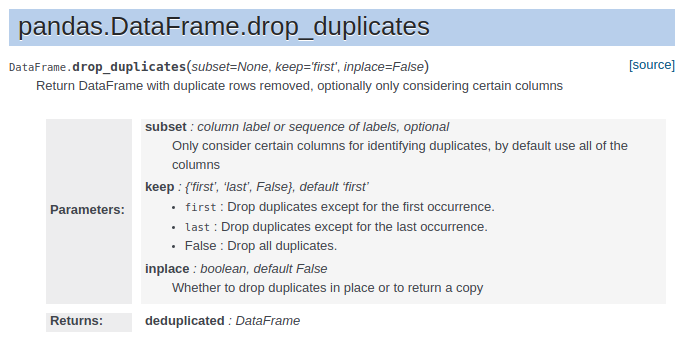

## Mapping

* The mapping is nothing more than the creation of a list of matches between two different values, with the ability to bind a value to a particular label or string.
* To define a mapping there is no better object than dict objects.

The functions that we will see in this section perform specific operations but all of them are united from accepting a dict object with matches as an argument.

- **replace()**: replaces values
- **map()**: creates a new column
- **rename()**: replaces the index values



### Replacing Values via Mapping



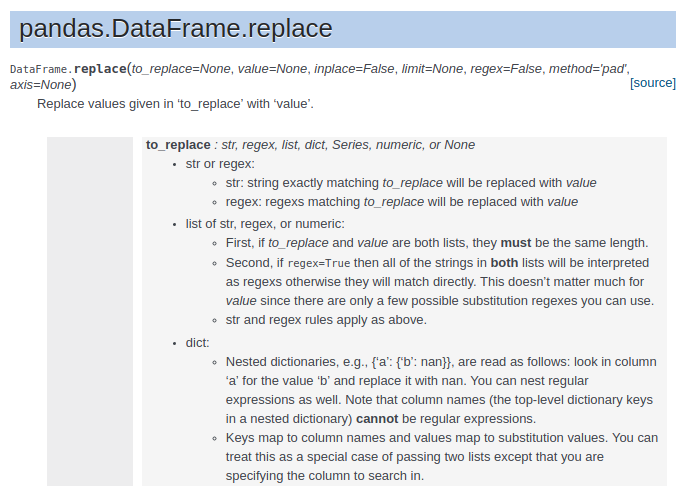

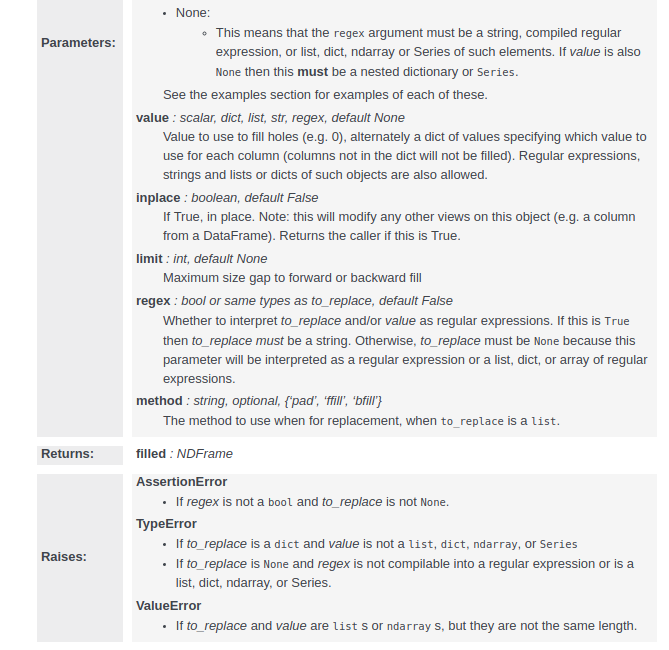

In [128]:
frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                       'color':['white','rosso','verde','black','yellow'],
                       'price':[5.56,4.20,1.30,0.56,2.75]})

In [129]:
frame

color     item  price
0   white     ball   5.56
1   rosso      mug   4.20
2   verde      pen   1.30
3   black   pencil   0.56
4  yellow  ashtray   2.75

In [130]:
newcolors = {
    'rosso': 'red',
    'verde': 'green'
 }

In [131]:
frame.replace(newcolors)

color     item  price
0   white     ball   5.56
1     red      mug   4.20
2   green      pen   1.30
3   black   pencil   0.56
4  yellow  ashtray   2.75

In [132]:
ser = pd.Series([1,3,np.nan,4,6,np.nan,3])

In [133]:
ser

0    1.0
1    3.0
2    NaN
3    4.0
4    6.0
5    NaN
6    3.0
dtype: float64

In [134]:
ser.replace(np.nan,0)

0    1.0
1    3.0
2    0.0
3    4.0
4    6.0
5    0.0
6    3.0
dtype: float64

### Adding Values via Mapping



In [135]:
frame = pd.DataFrame({ 'item':['ball','mug','pen','pencil','ashtray'],
                     'color':['white','red','green','black','yellow'
                             ]})
frame

color     item
0   white     ball
1     red      mug
2   green      pen
3   black   pencil
4  yellow  ashtray

In [136]:
prices = {
    'ball' : 5.56,
    'mug' : 4.20,
    'bottle' : 1.30,
    'scissors' : 3.41,
    'pen' : 1.30,
    'pencil' : 0.56,
    'ashtray' : 2.75
 }

* The **map()** function applied to a Series or to a column of a DataFrame accepts a function or an object containing a dict with mapping. 
* So in our case we can apply the mapping of the prices on the column item, making sure to add a column to the price data frame.

In [137]:
frame['price'] = frame['item'].map(prices)

In [138]:
frame

color     item  price
0   white     ball   5.56
1     red      mug   4.20
2   green      pen   1.30
3   black   pencil   0.56
4  yellow  ashtray   2.75

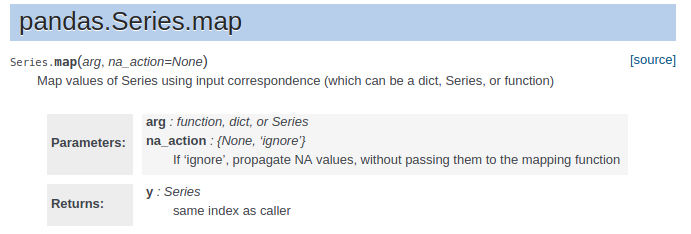

### Rename the Indexes of the Axes



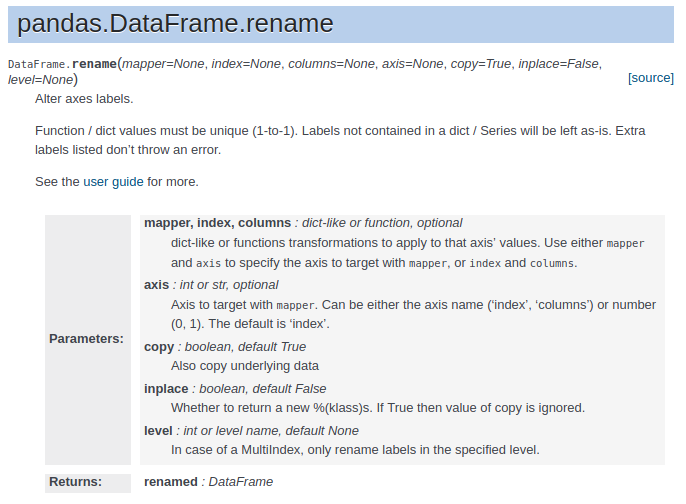

In [139]:
frame

color     item  price
0   white     ball   5.56
1     red      mug   4.20
2   green      pen   1.30
3   black   pencil   0.56
4  yellow  ashtray   2.75

In [140]:
reindex = {
   0: 'first',
   1: 'second',
   2: 'third',
   3: 'fourth',
   4: 'fifth'}

In [141]:
frame.rename(reindex)

color     item  price
first    white     ball   5.56
second     red      mug   4.20
third    green      pen   1.30
fourth   black   pencil   0.56
fifth   yellow  ashtray   2.75

* As we can see, by default, the indexes are renamed. If we want to rename columns we must use the columns option. Thus this time we assign various mapping explicitly to the two index and columns options.

In [142]:
recolumn = {
    'item':'object',
    'price': 'value'}

In [143]:
frame.rename(index=reindex, columns=recolumn)

color   object  value
first    white     ball   5.56
second     red      mug   4.20
third    green      pen   1.30
fourth   black   pencil   0.56
fifth   yellow  ashtray   2.75

* So far we have seen that the rename() function returns a DataFrame with the changes, leaving unchanged the original DataFrame.
* If we want the changes to take effect on the object on which we call the function, we will set the inplace option to True

In [144]:
frame.rename(columns={'item':'object'}, inplace=True)
frame

color   object  price
0   white     ball   5.56
1     red      mug   4.20
2   green      pen   1.30
3   black   pencil   0.56
4  yellow  ashtray   2.75

## Discretization and Binning



* Discretization is the process of converting real gene expression data into a typically small number of finite values (e.g. high, medium, low)

In [145]:
results = [12,34,67,55,28,90,99,12,3,56,74,44,87,23,49,89,87]

* We know that the experimental values have a range from 0 to 100; therefore we can uniformly divide this interval, for example, into four equal parts, i.e., bins.
* The first contains the values between 0 and 25, the second between 26 and 50, the third between 51 and 75, and the last between 76 and 100.

To do this binning with pandas, first we have to define an array containing the values of separation of bin:

In [146]:
bins = [0,25,50,75,100]

Then there is a special function called cut() and apply it to the array of results also passing the bins

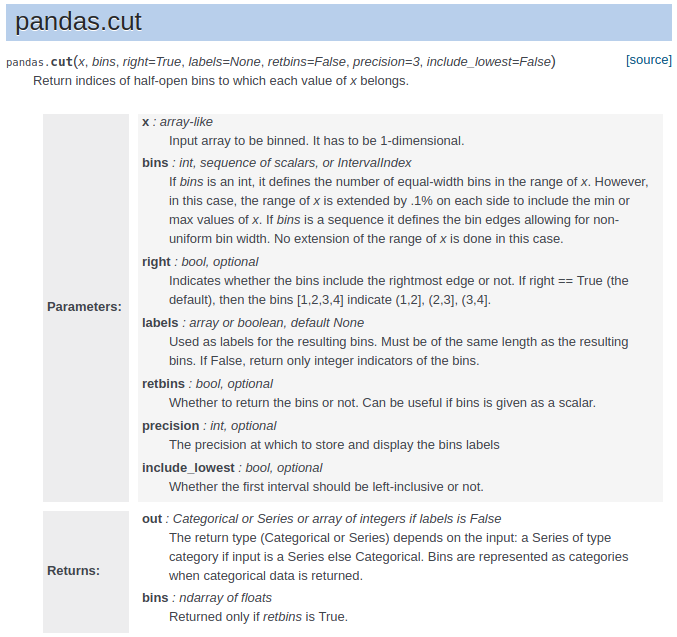

In [147]:
cato = pd.cut(results, bins)

In [148]:
cato

[(0, 25], (25, 50], (50, 75], (50, 75], (25, 50], ..., (75, 100], (0, 25], (25, 50], (75, 100], (75, 100]]
Length: 17
Categories (4, interval[int64]): [(0, 25] < (25, 50] < (50, 75] < (75, 100]]

* The object returned by the cut() function is a special object of Categorical type.
* We can consider it as an array of strings indicating the name of the bin.


* Internally it contains a levels array indicating the names of the different internal categories and a labels array that contains a list of numbers equal to the elements of results (i.e., the array subjected to binning).
* The number corresponds to the bin to which the corresponding element of results is assigned.

In [149]:
cato.codes

array([0, 1, 2, 2, 1, 3, 3, 0, 0, 2, 2, 1, 3, 0, 1, 3, 3], dtype=int8)

Finally to know the occurrences for each bin, that is, how many results fall into each category, we have to use the value_counts() function.



In [150]:
pd.value_counts(cato)

(75, 100]    5
(50, 75]     4
(25, 50]     4
(0, 25]      4
dtype: int64

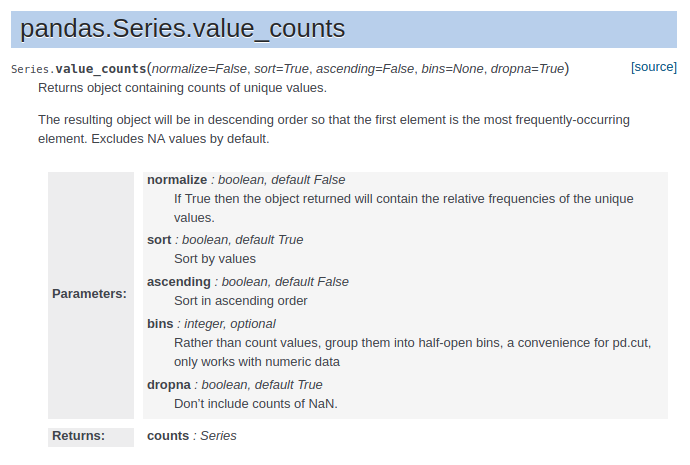

In [151]:
bin_names = ['unlikely','less likely','likely','highly likely']

In [152]:
pd.cut(results, bins, labels=bin_names)

[unlikely, less likely, likely, likely, less likely, ..., highly likely, unlikely, less likely, highly likely, highly likely]
Length: 17
Categories (4, object): [unlikely < less likely < likely < highly likely]

If the cut() function is passed as an argument to an integer instead of explicating the bin edges, this will divide the range of values of the array in many intervals as specified by the number

In [153]:
pd.cut(results, 5)

[(2.904, 22.2], (22.2, 41.4], (60.6, 79.8], (41.4, 60.6], (22.2, 41.4], ..., (79.8, 99.0], (22.2, 41.4], (41.4, 60.6], (79.8, 99.0], (79.8, 99.0]]
Length: 17
Categories (5, interval[float64]): [(2.904, 22.2] < (22.2, 41.4] < (41.4, 60.6] < (60.6, 79.8] < (79.8, 99.0]]

* In addition to cut(), pandas provides another method for binning: **qcut()**. 
* This function divides the sample directly into quintiles. 
* In fact, depending on the distribution of the data sample, using cut() rightly we will have a different number of occurrences for each bin.
* Instead **qcut()** will ensure that the number of occurrences for each bin is equal, but the edges of each bin to vary.

In [154]:
quintiles = pd.qcut(results, 5)

In [155]:
quintiles

[(2.999, 24.0], (24.0, 46.0], (62.6, 87.0], (46.0, 62.6], (24.0, 46.0], ..., (62.6, 87.0], (2.999, 24.0], (46.0, 62.6], (87.0, 99.0], (62.6, 87.0]]
Length: 17
Categories (5, interval[float64]): [(2.999, 24.0] < (24.0, 46.0] < (46.0, 62.6] < (62.6, 87.0] < (87.0, 99.0]]

In [156]:
 pd.value_counts(quintiles)

(62.6, 87.0]     4
(2.999, 24.0]    4
(87.0, 99.0]     3
(46.0, 62.6]     3
(24.0, 46.0]     3
dtype: int64

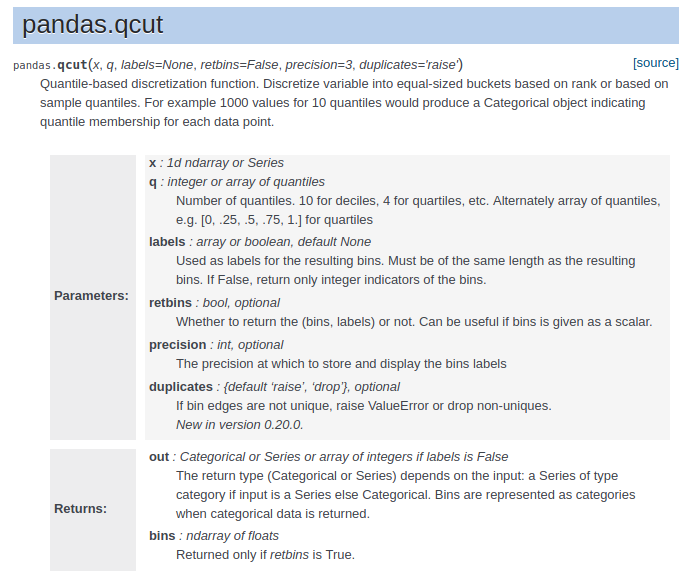

## Detecting and Filtering Outliers

* During the data analysis, the need to detect the presence of abnormal values within a data structure often arises. 
* By way of example, create a DataFrame with three columns from 1,000 completely random values:

In [157]:
randframe = pd.DataFrame(np.random.randn(1000,3))
randframe

0         1         2
0   -0.159423  1.144096  0.381126
1   -1.474410 -0.148321  2.280169
2    0.439410 -1.375951 -1.034884
3    0.298921 -0.874044 -0.663660
4    0.324367  0.044390 -1.913879
5    1.377855 -0.917134 -0.293989
6   -1.759039  0.216160  0.582968
7    0.213422  1.438662 -0.339973
8    0.763090  1.625979 -0.626911
9    0.508909  0.619167 -0.673954
10  -0.677063 -0.918951 -0.629331
11  -0.064176 -0.337784  0.332569
12  -0.022757  1.121954 -0.283930
13  -1.641776 -1.958038 -0.734721
14   0.818134 -0.842652  0.383891
15  -0.160719  1.081670  0.205504
16   0.553472  0.014825  0.588972
17   1.243934 -0.007940  0.058944
18  -0.704417 -0.963845  0.467047
19  -1.859875  0.397593 -1.733259
20  -0.978511 -3.094025 -0.103492
21  -1.408739 -0.476438  0.831774
22   1.473449 -0.902348 -0.081037
23  -0.803007 -1.545979 -1.012720
24   1.164074 -0.145195 -0.636257
25   0.860505  0.196230 -1.885549
26  -1.087294  1.442138 -0.132008
27   0.337138  0.780155  0.126722
28  -0.695389 -0.338612 -2.494918
29  -0.570128  1.151491  1.125309
..        ...       ...       ...
970  0.118791 -1.617195  2.103830
971 -1.036621  1.675933 -1.218502
972 -0.245952  0.358483  2.687603
973  1.168239 -1.942699  0.063466
974 -0.905261 -0.179922 -0.409915
975  0.492286  0.992073  1.740392
976 -1.563640 -2.049763  1.247418
977  0.897351 -0.423051 -0.569527
978 -1.239160 -0.324078 -0.671574
979  0.330254  1.348867  0.623506
980 -1.355022  2.001544 -0.731486
981 -0.831084 -0.831305 -0.318163
982 -0.715560  1.051601  0.572732
983 -0.431189 -1.153075 -0.096872
984 -0.222889  0.741364 -0.333073
985 -0.750191 -0.358729  0.258980
986 -0.906480 -0.422317  0.036489
987  0.562876  0.968827  0.778455
988  1.539187 -1.638494  0.143644
989  1.097960  0.865554 -0.255462
990 -0.673893  1.191550  0.326811
991  0.966647  1.305215 -0.308025
992 -0.420211  0.218723 -0.883281
993  1.180644  0.633250 -0.603721
994 -1.132060 -1.829714  0.815355
995 -0.508804 -0.783413 -1.200523
996 -0.561846  0.792199  0.906873
997  1.739201 -0.863285  0.785823
998  0.931563 -2.469434  1.395183
999 -0.437150 -0.795412  0.146306

[1000 rows x 3 columns]

In [158]:
randframe.describe()

0            1            2
count  1000.000000  1000.000000  1000.000000
mean      0.002064     0.028715    -0.026366
std       0.952859     1.022695     0.985704
min      -3.144412    -3.096683    -2.890320
25%      -0.634118    -0.654881    -0.651345
50%       0.030423     0.059336    -0.016374
75%       0.665882     0.689761     0.611317
max       3.507213     3.192365     2.814239

For example, we might consider outliers those that have a value greater than three times the standard deviation. To have only the standard deviation of each column of the DataFrame, use the std() function.

In [159]:
randframe.std()

0    0.952859
1    1.022695
2    0.985704
dtype: float64

Now we apply the filtering of all the values of the DataFrame, applying the corresponding standard deviation for each column. Thanks to the any() function, we can apply the filter on each column.

In [160]:
randframe[(np.abs(randframe) > (3*randframe.std())).any(axis=1)]

0         1         2
20  -0.978511 -3.094025 -0.103492
136 -0.676377  3.192365  2.084598
239 -3.144412 -1.657257 -1.623679
338  3.507213 -0.074703 -0.464637
539  0.009592  3.092290 -2.030216
703  0.962513 -3.096683 -0.254700

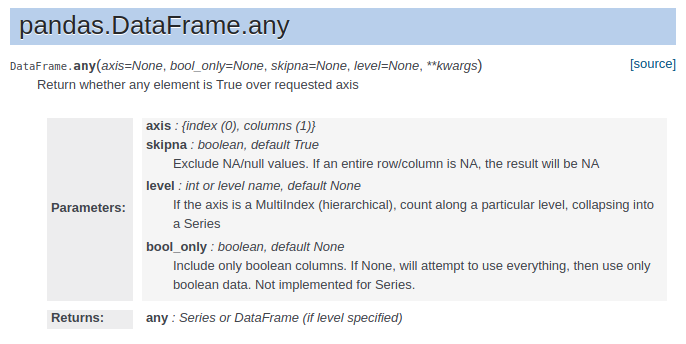

## Data Aggregation



**Data aggregation** is any process in which information is gathered and expressed in a summary form, for purposes such as statistical analysis

### GroupBy



* It refers to its internal mechanism as a process called SPLIT-APPLY-COMBINE.
* So in its pattern of operation we may conceive this process as divided into three different phases expressed precisely by three operations:

   - **splitting**: division into groups of datasets
   - **applying**: application of a function on each group
   - **combining**: combination of all the results obtained by different groups

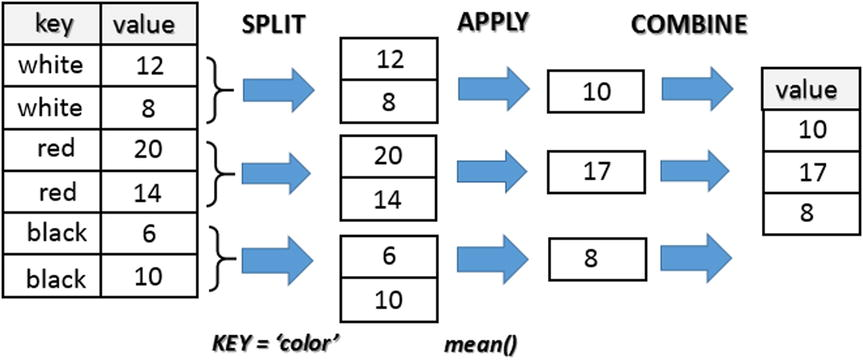

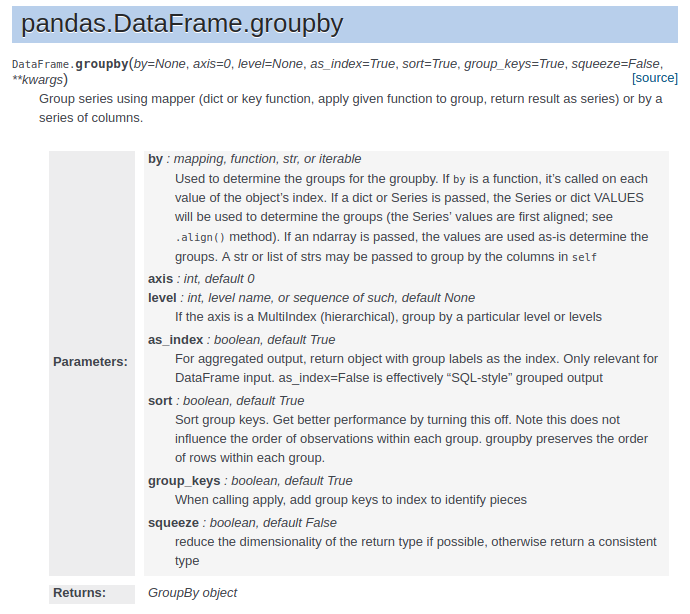

In [161]:
frame = pd.DataFrame({'color': ['white','red','green','red','green'],
                      'object': ['pen','pencil','pencil','ashtray','pen'],
                      'price1' : [5.56,4.20,1.30,0.56,2.75],
                      'price2' : [4.75,4.12,1.60,0.75,3.15]})
frame

color   object  price1  price2
0  white      pen    5.56    4.75
1    red   pencil    4.20    4.12
2  green   pencil    1.30    1.60
3    red  ashtray    0.56    0.75
4  green      pen    2.75    3.15

* Suppose we want to calculate the average **price1** column using group labels listed in the column color. 
* There are several ways to do this.
* for example we can access the price1 column and call the groupby() function with the column 'color'.

In [162]:
group = frame["price1"].groupby(frame['color'])

In [163]:
group

* The object that we got is a GroupBy object.
* In the operation that we just did there was not really any calculation; there was just a collection of all the information needed to calculate to be executed.
* What we have done is in fact a process of grouping, in which all rows having the same value of color are grouped into a single item

In [164]:
group.groups

{'green': Int64Index([2, 4], dtype='int64'),
 'red': Int64Index([1, 3], dtype='int64'),
 'white': Int64Index([0], dtype='int64')}

* As we can see, each group is listed explicitly specifying the rows of the data frame assigned to each of them. 
* Now it is sufficient to apply the operation on the group to obtain the results for each individual group.

In [165]:
group.mean()

color
green    2.025
red      2.380
white    5.560
Name: price1, dtype: float64

In [166]:
group.sum()

color
green    4.05
red      4.76
white    5.56
Name: price1, dtype: float64

### Hierarchical Grouping



* we have seen how to group the data according to the values of a column as a key choice.
* The same thing can be extended to multiple columns, i.e., make a grouping of multiple keys hierarchical.

In [167]:
ggroup = frame['price1'].groupby([frame['color'],frame['object']])

In [168]:
ggroup.groups

{('green', 'pen'): Int64Index([4], dtype='int64'),
 ('green', 'pencil'): Int64Index([2], dtype='int64'),
 ('red', 'ashtray'): Int64Index([3], dtype='int64'),
 ('red', 'pencil'): Int64Index([1], dtype='int64'),
 ('white', 'pen'): Int64Index([0], dtype='int64')}

In [169]:
ggroup.sum()

color  object 
green  pen        2.75
       pencil     1.30
red    ashtray    0.56
       pencil     4.20
white  pen        5.56
Name: price1, dtype: float64

In [170]:
frame[['price1','price2']].groupby(frame['color']).mean()

price1  price2
color                
green   2.025   2.375
red     2.380   2.435
white   5.560   4.750

In [171]:
frame.groupby(frame['color']).mean()

price1  price2
color                
green   2.025   2.375
red     2.380   2.435
white   5.560   4.750

In [172]:
means = frame.groupby('color').mean().add_prefix('mean_')
means

mean_price1  mean_price2
color                          
green        2.025        2.375
red          2.380        2.435
white        5.560        4.750

### Group Iteration



* The GroupBy object supports the operation of an iteration for generating a sequence of 2-tuples containing the name of the group together with the data portion.

In [173]:
for name, group in frame.groupby('color'):
    print(name)
    print(group)

green
   color  object  price1  price2
2  green  pencil    1.30    1.60
4  green     pen    2.75    3.15
red
  color   object  price1  price2
1   red   pencil    4.20    4.12
3   red  ashtray    0.56    0.75
white
   color object  price1  price2
0  white    pen    5.56    4.75


### Functions on Groups




In [174]:
group = frame.groupby('color')

In [175]:
group

In [176]:
group['price1'].quantile(0.6)

color
green    2.170
red      2.744
white    5.560
Name: price1, dtype: float64

* In statistics and probability, quantiles are cut points dividing the range of a probability distribution into contiguous intervals with equal probabilities, or dividing the observations in a sample in the same way.

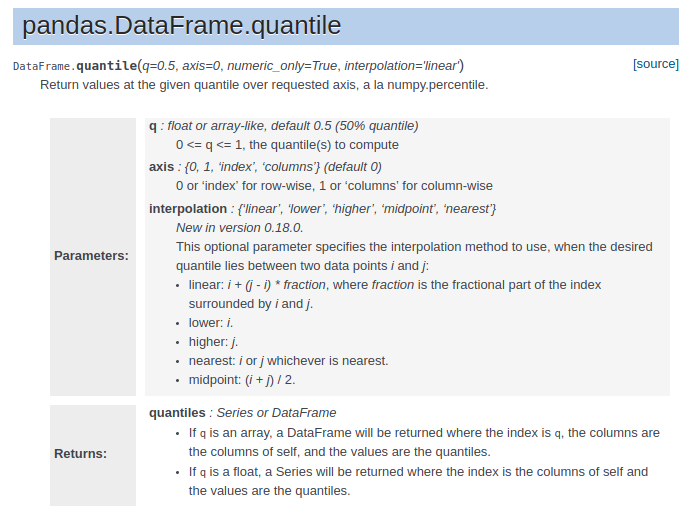

In [177]:
df = pd.DataFrame(np.array([[1, 1], [2, 10], [3, 100], [4, 100]]),
                   columns=['a', 'b'])

In [178]:
df

a    b
0  1    1
1  2   10
2  3  100
3  4  100

In [179]:
df.quantile(0.1)

a    1.3
b    3.7
Name: 0.1, dtype: float64

In [180]:
df.quantile([.1, .5])

a     b
0.1  1.3   3.7
0.5  2.5  55.0

* we can also define their own aggregation functions.
* Define the function separately and then we pass as an argument to the mark() function.
* For example, we could calculate the range of the values of each group.

In [181]:
def ranges(series):
  return series.max() - series.min()

In [182]:
group['price1'].agg(ranges)

color
green    1.45
red      3.64
white    0.00
Name: price1, dtype: float64

* The agg() function() allows we to use aggregate functions on an entire DataFrame.

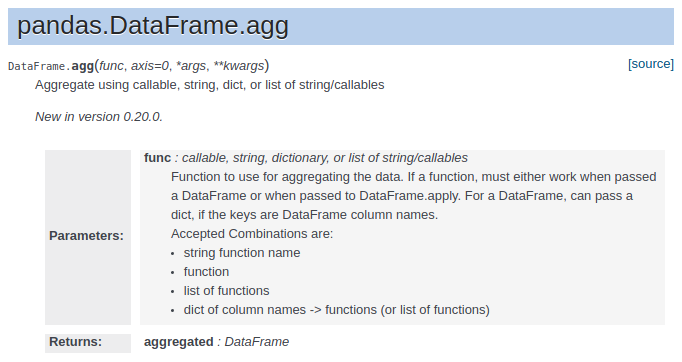

In [183]:
group.agg(ranges)

price1  price2
color                
green    1.45    1.55
red      3.64    3.37
white    0.00    0.00

* Also we can use more aggregate functions at the same time always with the mark() function passing an array containing the list of operations to be done, which will become the new columns

In [184]:
 group['price1'].agg(['mean','std',ranges])

mean       std  ranges
color                         
green  2.025  1.025305    1.45
red    2.380  2.573869    3.64
white  5.560       NaN    0.00

## Summarizing Data

The describe() function computes a summary of statistics pertaining to the DataFrame columns.

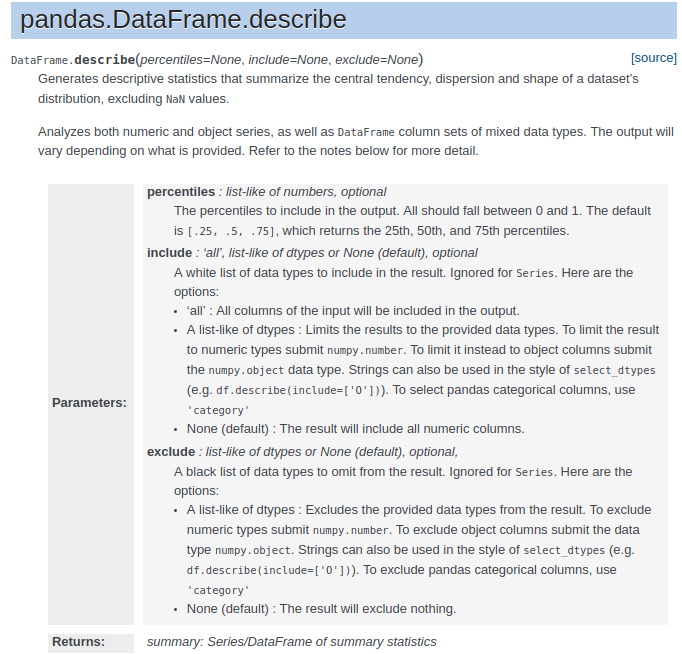

In [185]:
import pandas as pd
import numpy as np

#Create a Dictionary of series
d = {'Name':pd.Series(['Tom','James','Ricky','Vin','Steve','Smith','Jack',
   'Lee','David','Gasper','Betina','Andres']),
   'Age':pd.Series([25,26,25,23,30,29,23,34,40,30,51,46]),
   'Rating':pd.Series([4.23,3.24,3.98,2.56,3.20,4.6,3.8,3.78,2.98,4.80,4.10,3.65])}

#Create a DataFrame
df = pd.DataFrame(d)
print(df,'\n')
print (df.describe())

    Age    Name  Rating
0    25     Tom    4.23
1    26   James    3.24
2    25   Ricky    3.98
3    23     Vin    2.56
4    30   Steve    3.20
5    29   Smith    4.60
6    23    Jack    3.80
7    34     Lee    3.78
8    40   David    2.98
9    30  Gasper    4.80
10   51  Betina    4.10
11   46  Andres    3.65 

             Age     Rating
count  12.000000  12.000000
mean   31.833333   3.743333
std     9.232682   0.661628
min    23.000000   2.560000
25%    25.000000   3.230000
50%    29.500000   3.790000
75%    35.500000   4.132500
max    51.000000   4.800000


* This function gives the mean, std and IQR values.
* And, function excludes the character columns and given summary about numeric columns. 
* 'include' is the argument which is used to pass necessary information regarding what columns need to be considered for summarizing. 
* Takes the list of values; by default, 'number'.

* **object** − Summarizes String columns
* **number** − Summarizes Numeric columns
* **all** − Summarizes all columns together (Should not pass it as a list value)

In [186]:
print (df.describe(include=['object']))

       Name
count    12
unique   12
top     Tom
freq      1


In [187]:
print (df.describe(include='all'))

              Age Name     Rating
count   12.000000   12  12.000000
unique        NaN   12        NaN
top           NaN  Tom        NaN
freq          NaN    1        NaN
mean    31.833333  NaN   3.743333
std      9.232682  NaN   0.661628
min     23.000000  NaN   2.560000
25%     25.000000  NaN   3.230000
50%     29.500000  NaN   3.790000
75%     35.500000  NaN   4.132500
max     51.000000  NaN   4.800000


# Working with Sqlite db using pandas

In [9]:
import pandas as pd
import sqlite3

* SQLite is a C library that provides a lightweight disk-based database that doesn’t require a separate server process and allows accessing the database using a nonstandard variant of the SQL query language

* We can use the pandas read_sql_query function to read the results of a SQL query directly into a pandas DataFrame

In [10]:
conn = sqlite3.connect("data/flights.db")
df = pd.read_sql_query("select * from airlines limit 5;", conn)
df

index id                                          name alias  iata  icao  \
0      0  1                                Private flight    \N     -  None   
1      1  2                                   135 Airways    \N  None   GNL   
2      2  3                                 1Time Airline    \N    1T   RNX   
3      3  4  2 Sqn No 1 Elementary Flying Training School    \N  None   WYT   
4      4  5                               213 Flight Unit    \N  None   TFU   

  callsign         country active  
0     None            None      Y  
1  GENERAL   United States      N  
2  NEXTIME    South Africa      Y  
3     None  United Kingdom      N  
4     None          Russia      N

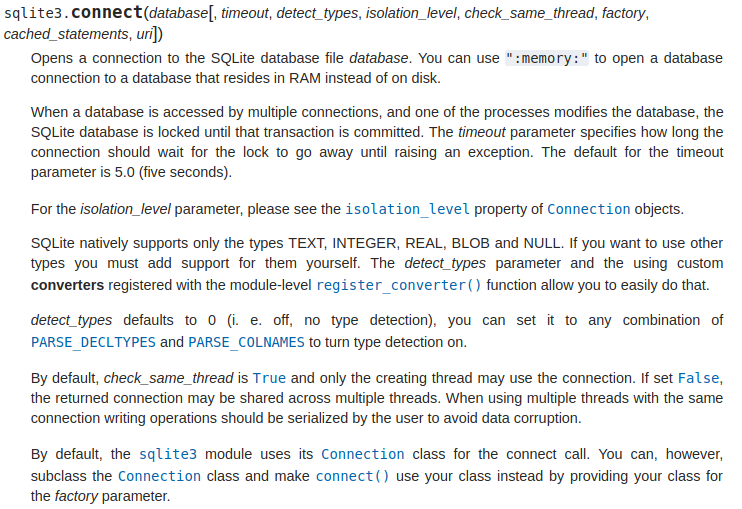

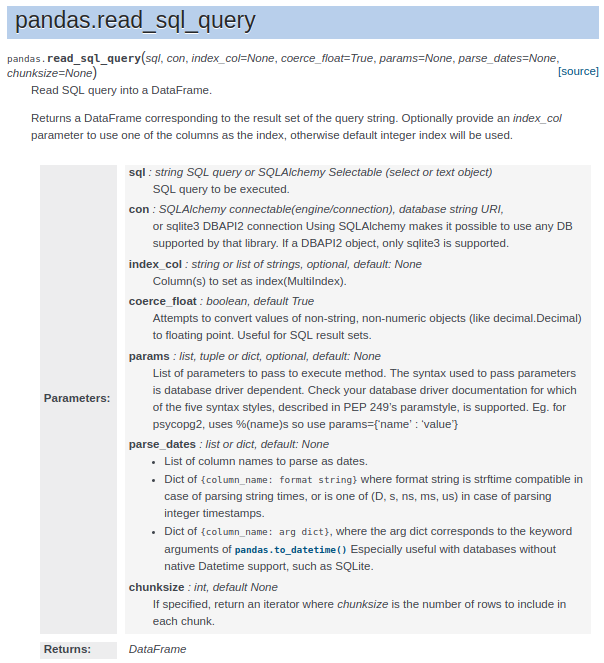

* As you can see, we get a nicely formatted DataFrame as the result. We could easily manipulate the columns:

In [190]:
df['country']

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

* It's highly recommended to use the read_sql_query function when possible.

**Modifying database rows**
* We can use the sqlite3 package to modify a SQLite database by inserting, updating, or deleting rows.

**Creating tables with pandas**
* The pandas package gives us a much faster way to create tables. 
* We just have to create a DataFrame first, then export it to a SQL table. 
* First, we'll create a DataFrame:

In [191]:
from datetime import datetime
df = pd.DataFrame(
    [[1, datetime(2016, 9, 29, 0, 0) , datetime(2016, 9, 29, 12, 0), 'T1', 1]], 
    columns=["id", "departure", "arrival", "number", "route_id"]
)

In [192]:
df

id  departure             arrival number  route_id
0   1 2016-09-29 2016-09-29 12:00:00     T1         1

* Then, we'll be able to call the to_sql method to convert df to a table in a database. 
* We set the keep_exists parameter to replace to delete and replace any existing tables named daily_flights:

In [193]:
df.to_sql("daily_flights", conn, if_exists="replace")

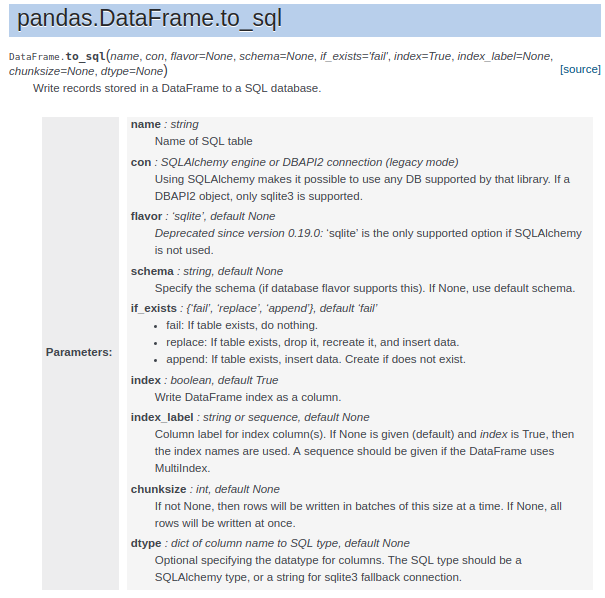

* We can then verify that everything worked by querying the database:

In [194]:
pd.read_sql_query("select * from daily_flights;", conn)

index  id            departure              arrival number  route_id
0      0   1  2016-09-29 00:00:00  2016-09-29 12:00:00     T1         1

**Altering tables with Pandas**
* It's also possible to use Pandas to alter tables by exporting the table to a DataFrame, making modifications to the DataFrame, then exporting the DataFrame to a table:

In [195]:
df = pd.read_sql("select * from daily_flights", conn)
df["delay_minutes"] = None
df.to_sql("daily_flights", conn, if_exists="replace")

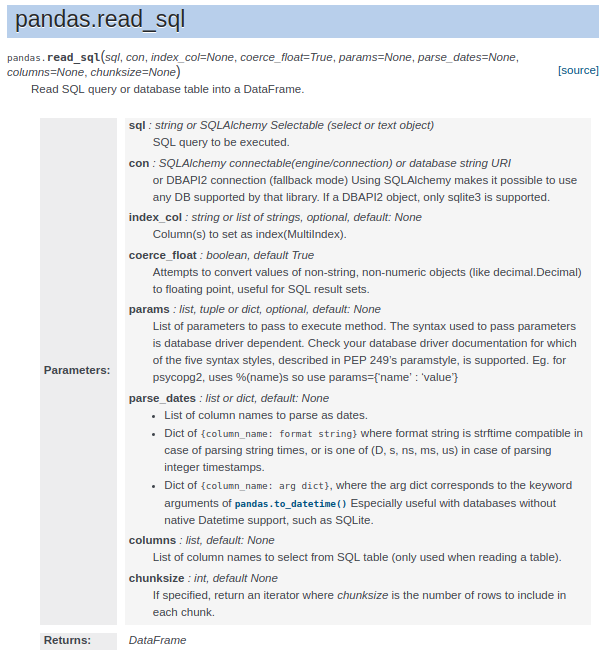

* The above code will add a column called delay_minutes to the daily_flights table

In [196]:
pd.read_sql_query("select * from daily_flights;", conn)

level_0  index  id            departure              arrival number  \
0        0      0   1  2016-09-29 00:00:00  2016-09-29 12:00:00     T1   

   route_id delay_minutes  
0         1          None

# Time series Analysis

* Time-series analysis belongs to a branch of Statistics that involves the study of ordered, often temporal data.
* When relevantly applied, time-series analysis can reveal unexpected trends, extract helpful statistics, and even forecast trends ahead into the future. 
* For these reasons, it is applied across many fields including economics, weather forecasting, and capacity planning, to name a few.

**Loading Time-series Data**

In [197]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


* Conveniently, statsmodels comes with built-in datasets, so we can load a time-series dataset straight into memory.

* We'll be working with a dataset called "Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.," which collected CO2 samples from March 1958 to December 2001.
* We can bring in this data as follows:

In [198]:
data = sm.datasets.co2.load_pandas()
co2 = data.data

In [199]:
co2.head(5)

co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4

**Indexing with Time-series Data**

* You may have noticed that the dates have been set as the index of our pandas DataFrame. 
* When working with time-series data in Python we should ensure that dates are used as an index, so make sure to always check for that, which we can do by running the following:

In [200]:
co2.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

* The dtype=datetime[ns] field confirms that our index is made of date stamp objects, while length=2284 and freq='W-SAT' tells us that we have 2,284 weekly date stamps starting on Saturdays.

* Weekly data can be tricky to work with, so let's use the monthly averages of our time-series instead.
* This can be obtained by using the convenient resample function, which allows us to group the time-series into buckets (1 month), apply a function on each group (mean), and combine the result (one row per group).

In [201]:
y = co2['co2'].resample('MS').mean()

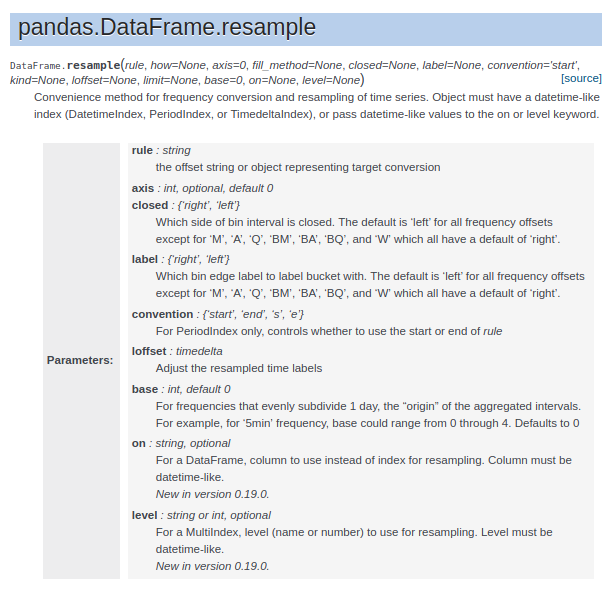

* Here, the term MS means that we group the data in buckets by months and ensures that we are using the start of each month as the timestamp:

In [202]:
y.head(5)

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

* An interesting feature of pandas is its ability to handle date stamp indices, which allow us to quickly slice our data. 
* For example, we can slice our dataset to only retrieve data points that come after the year 1990:

In [203]:
y['1990':]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
1990-06-01    356.080
1990-07-01    354.675
1990-08-01    352.900
1990-09-01    350.940
1990-10-01    351.225
1990-11-01    352.700
1990-12-01    354.140
1991-01-01    354.675
1991-02-01    355.650
1991-03-01    357.200
1991-04-01    358.600
1991-05-01    359.250
1991-06-01    358.180
1991-07-01    356.050
1991-08-01    353.860
1991-09-01    352.125
1991-10-01    352.250
1991-11-01    353.740
1991-12-01    355.025
1992-01-01    355.900
1992-02-01    356.680
1992-03-01    357.900
1992-04-01    359.075
1992-05-01    359.540
1992-06-01    359.125
               ...   
1999-07-01    369.000
1999-08-01    366.700
1999-09-01    364.675
1999-10-01    365.140
1999-11-01    366.650
1999-12-01    367.900
2000-01-01    369.020
2000-02-01    369.375
2000-03-01    370.400
2000-04-01    371.540
2000-05-01    371.650
2000-06-01    371.625
2000-07-01    369.940
2000-08-01    367.950
2000-09-01

* Or, we can slice our dataset to only retrieve data points between October 1995 and October 1996:

In [204]:
y['1995-10-01':'1996-10-01']

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

**Handling Missing Values in Time-series Data**
* Real world data tends be messy

In [205]:
y.isnull().sum()

5

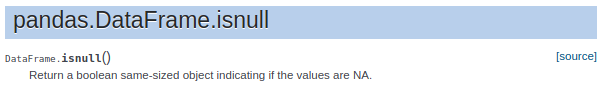

* This output tells us that there are 5 months with missing values in our time series.

* Generally, we should "fill in" missing values if they are not too numerous so that we don’t have gaps in the data. 
* We can do this in pandas using the fillna() command.
* For simplicity, we can fill in missing values with the closest non-null value in our time series, although it is important to note that a rolling mean would sometimes be preferable.

In [206]:
y = y.fillna(y.bfill())

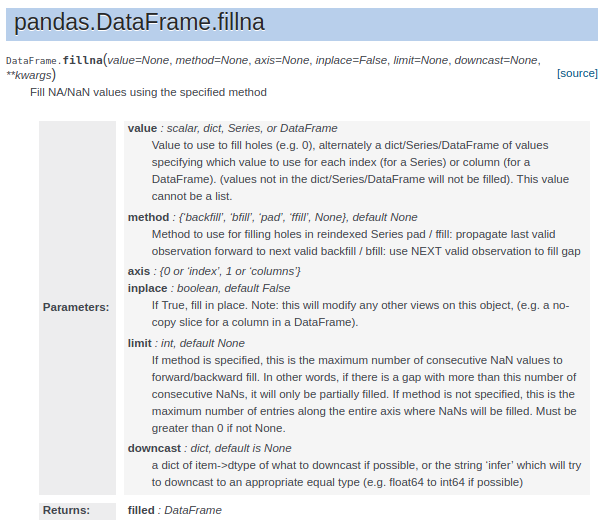

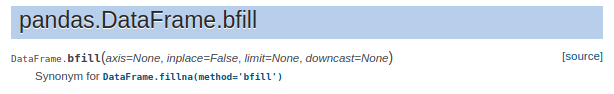

* With missing values filled in, we can once again check to see whether any null values exist to make sure that our operation worked:

In [207]:
y.isnull().sum()

0

**Visualizing Time-series Data**

* When working with time-series data, a lot can be revealed through visualizing it. A few things to look out for are:

    * **seasonality**: does the data display a clear periodic pattern?
    * **trend**: does the data follow a consistent upwards or downward slope?
    * **noise**: are there any outlier points or missing values that are not consistent with the rest of the data?

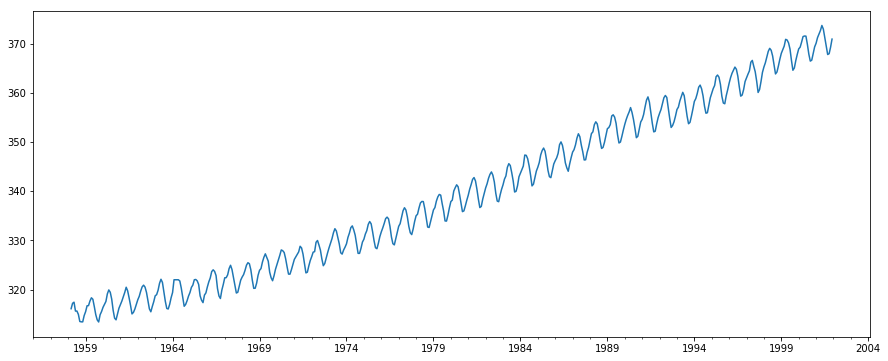

In [208]:
y.plot(figsize=(15, 6))
plt.show()

* Some distinguishable patterns appear when we plot the data. 
* The time-series has an obvious seasonality pattern, as well as an overall increasing trend. 
* We can also visualize our data using a method called time-series decomposition. 
* As its name suggests, time series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

* Fortunately, statsmodels provides the convenient seasonal_decompose function to perform seasonal decomposition out of the box
* The script below shows how to perform time-series seasonal decomposition in Python. 

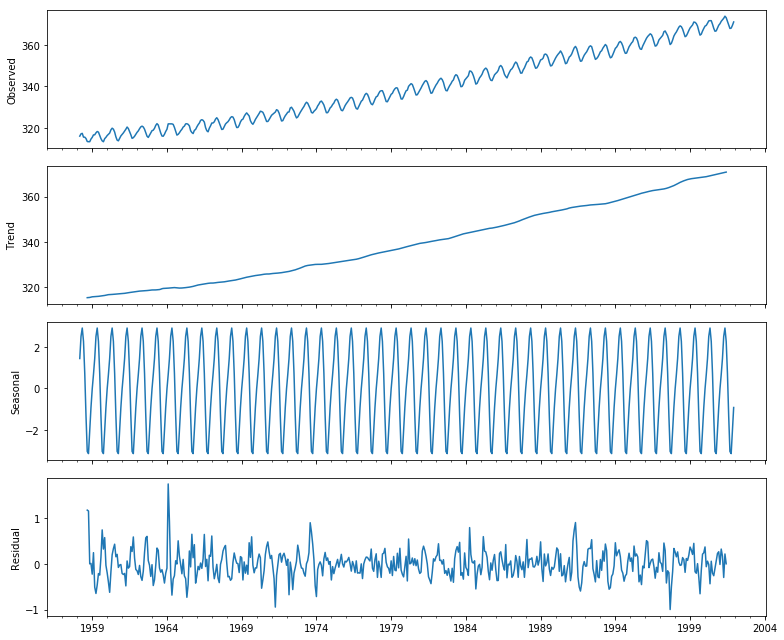

In [209]:
from pylab import rcParams
rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

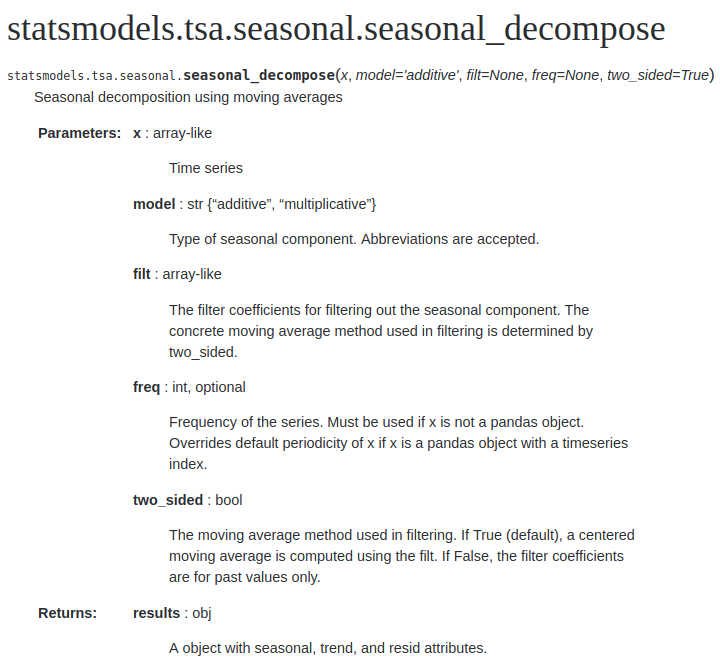

* Using time-series decomposition makes it easier to quickly identify a changing mean or variation in the data
* The plot above clearly shows the upwards trend of our data, along with its yearly seasonality.
* These can be used to understand the structure of our time-series.
* The intuition behind time-series decomposition is important, as many forecasting methods build upon this concept of structured decomposition to produce forecasts.

# Reference

**pd.Series()             -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html<br>
pd.date_range()         -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html<br>
pd.DataFrame()	        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html<br>
describe()	            -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html<br>
apply()		            -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html<br>
pd.read_csv()	        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html<br>
head()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html<br>
tail()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.tail.html<br>
pd.read_table()		    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html<br>
get_dtype_counts()	    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.get_dtype_counts.html<br>
str.replace()		    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.replace.html<br>
drop()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html<br>
sort_values()		    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html<br>
loc()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html<br>
iloc()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html<br>
isin()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isin.html<br>
mean()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html<br>
pd.merge()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html<br>
index			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Index.html<br>
columns			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html<br>
join()		-	        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html<br>
pd.concat()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html<br>
combine_first()		    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.combine_first.html<br>
stack()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html<br>
unstack()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html<br>
pivot()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html<br>
duplicated()		    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.duplicated.html<br>
replace()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html<br>
map()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.map.html<br>
rename()		        -http://pandas.pydata.org/pandas-docs/version/0.20.2/generated/pandas.DataFrame.rename.html<br>
pd.cut()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html<br>
pd.values_counts()	    -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html<br>
pd.qcut()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html<br>
std()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html<br>
any()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.any.html<br>
groupby()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html<br>
groups			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.groups.html<br>
sum()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html<br>
quantile()		        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html<br>
agg()			        -https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.agg.html<br>
plot()			        -https://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
plot.scatter()		    -https://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
plot.area()		        -https://pandas.pydata.org/pandas-docs/stable/visualization.html<br>
np.abs()		        -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.absolute.html<br>
np.nan			        -https://docs.scipy.org/doc/numpy-1.13.0/user/misc.html<br>
reshape()		        -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.reshape.html<br>
np.arange()		        -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.arange.html<br>
np.random.randn()	    -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randn.html<br>
np.random.randint()	    -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.randint.html<br>
np.cumsum()		        -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.cumsum.html<br>
np.random.rand()	    -https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.random.rand.html<br>**


**Python Data Analytics**: Data Analysis and Science Using Pandas, matplotlib, and the Python Programming Language
by **Fabio Nelli**<br>
pandas cookbook by **Theodore Petrou**<br>
Dataschool - https://www.youtube.com/watch?v=yzIMircGU5I&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y by Kevin Markham


* https://www.tutorialspoint.com/python_pandas/python_pandas_timedelta.htm
* https://www.tutorialspoint.com/python_pandas/python_pandas_date_functionality.htm
* https://www.dataquest.io/blog/python-pandas-databases/
* https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3
* https://www.tutorialspoint.com/python_pandas/python_pandas_indexing_and_selecting_data.htm